##### **Problem Statement**
Our client is ABC a leading firm and is doing well in the sector. It is recently facing a steep increase in its employee attrition . Employee attrition has gone up from 14% to 25% in the last 1 year . We are asked to prepare a strategy to immediately tackle this issue such that the firm’s business is not hampered and also to propose an efficient employee satisfaction program for long run. Currently, no such program is in place . Further salary hikes are not an option.

##### **Data Description**
The dataset consists of 1470 observations and 8 variables. Each row in dataset represents an employee; each column contains employee attributes:

Independent Variables were:

- Age: Age of employees,
- Department: Department of work,
- Distance from home,
- Education: 1-Below College; 2-College; 3-Bachelor; 4-Master; 5-Doctor;
- Education Field
- Environment Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
- Job Satisfaction: 1-Low; 2-Medium; 3-High; 4-Very High;
- Marital Status,
- Monthly Income,
- Num Companies Worked: Number of companies worked prior to IBM,
- Work Life Balance: 1-Bad; 2-Good; 3-Better; 4-Best;
- Years At Company: Current years of service in IBM

Dependent Variable was:
- Attrition: Employee attrition status(0 or 1)

In [1155]:
#General
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.cm as cm

#Feature selection imports
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.feature_selection import ExhaustiveFeatureSelector

#Models
from sklearn.linear_model import Lasso, RidgeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.linear_model import LogisticRegressionCV
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, Birch
from sklearn.metrics import silhouette_samples, silhouette_score

#Metrics - models selection
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.metrics import average_precision_score, make_scorer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
from sklearn import metrics
import graphviz
import statsmodels.api as sm

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)

In [2]:
df = pd.read_csv("Attrition Data.csv", sep = ',')

## AGENDA:

* DATA EXPLORATION
* DATA PREPARATIONS
* MODEL TUNING / PREDICTIONS

# DATA EXPLORATION

In [11]:
df1 = df.copy()

In [12]:
df1.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


In [477]:
df1.describe()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.739456,9.192517,2.912925,1.819048,2.721769,2.728571,0.902721,6502.931293,2.693197,2.761224,7.008163,0.161224
std,9.135373,0.527792,8.106864,1.024165,1.111811,1.093082,1.102846,0.730121,4707.956783,2.498009,0.706476,6.126525,0.367863
min,18.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1009.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,0.000000,2911.000000,1.000000,2.000000,3.000000,0.000000
50%,36.000000,1.000000,7.000000,3.000000,2.000000,3.000000,3.000000,1.000000,4919.000000,2.000000,3.000000,5.000000,0.000000
75%,43.000000,1.000000,14.000000,4.000000,2.000000,4.000000,4.000000,1.000000,8379.000000,4.000000,3.000000,9.000000,0.000000
max,60.000000,2.000000,29.000000,5.000000,5.000000,4.000000,4.000000,2.000000,19999.000000,9.000000,4.000000,40.000000,1.000000


In [14]:
df_dtypes = df1.dtypes.reset_index()

In [15]:
df_dtypes

,index,0
0,Age,int64
1,Attrition,object
2,Department,object
3,DistanceFromHome,int64
4,Education,int64
5,EducationField,object
6,EnvironmentSatisfaction,int64
7,JobSatisfaction,int64
8,MaritalStatus,object
9,MonthlyIncome,int64


### Outlier Analysis

Outlier plot for %s Age


<AxesSubplot:xlabel='Age'>

Outlier plot for %s DistanceFromHome


<AxesSubplot:xlabel='DistanceFromHome'>

Outlier plot for %s NumCompaniesWorked


<AxesSubplot:xlabel='NumCompaniesWorked'>

Outlier plot for %s YearsAtCompany


<AxesSubplot:xlabel='YearsAtCompany'>

Outlier plot for %s MonthlyIncome


<AxesSubplot:xlabel='MonthlyIncome'>

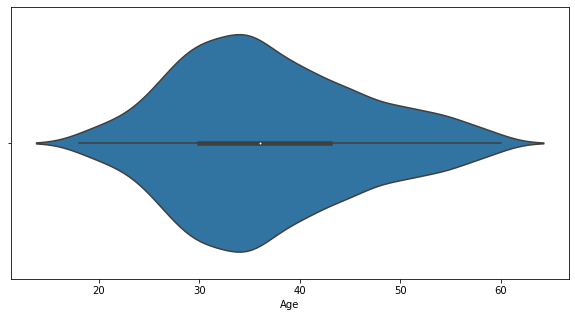

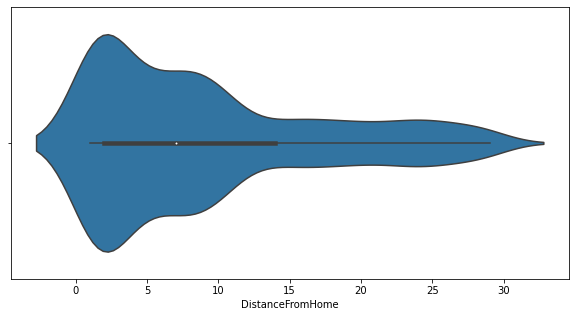

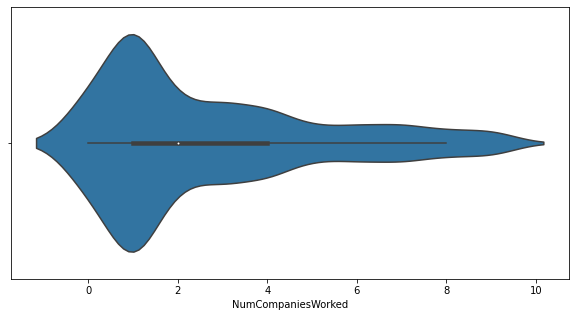

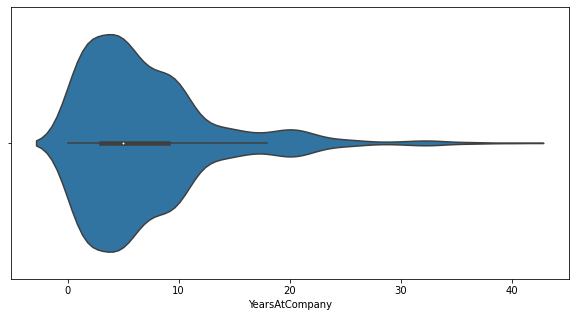

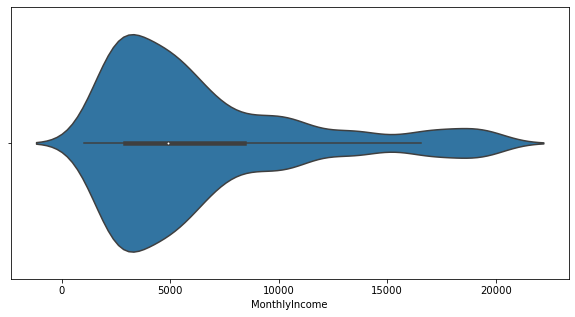

In [27]:
# Outlier values
num_cols = ['Age','DistanceFromHome','NumCompaniesWorked','YearsAtCompany','MonthlyIncome']

for i in num_cols:
    print('Outlier plot for %s', i)
    plt.figure(figsize = (10,5))
    plt.xlabel(i)
    plt.xticks()
    display(sns.violinplot(data = df1, x = i))

These are not potentially outliers. Let us retain these values further in our analyses

### Histogram For Numericals

<AxesSubplot:xlabel='Attrition', ylabel='Count'>

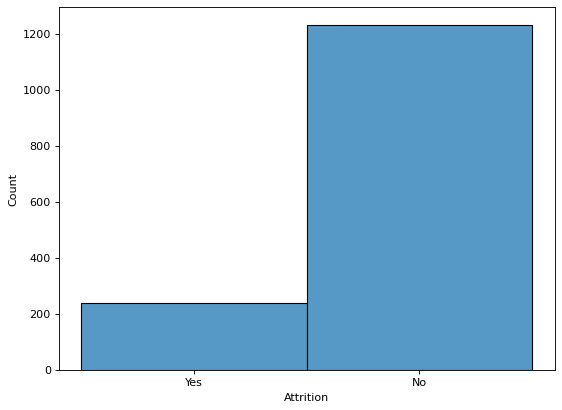

In [36]:
figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df1,x = 'Attrition')

We observe a class imbalanace in this dataset.

<AxesSubplot:xlabel='JobSatisfaction', ylabel='Count'>

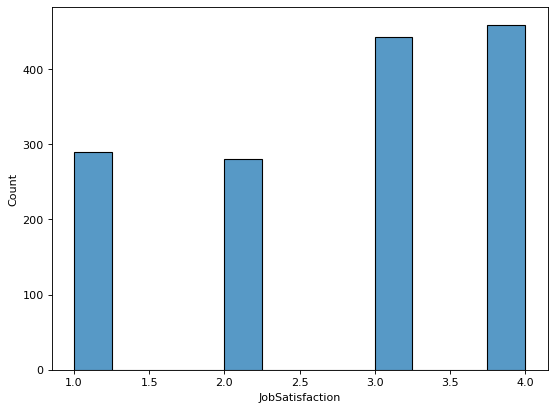

In [39]:
figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df1,x = 'JobSatisfaction')

<AxesSubplot:xlabel='EducationField', ylabel='Count'>

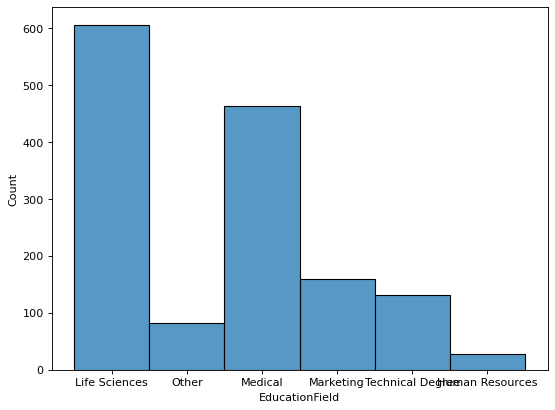

In [38]:
figure(figsize=(8, 6), dpi=80)
sns.histplot(data = df1,x = 'EducationField')

### Numerical Variable Analysis

In [67]:
num_vars = df_dtypes[df_dtypes[0]!="object"]["index"].tolist()
num_vars

['Age',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'WorkLifeBalance',
 'YearsAtCompany']

In [70]:
new_num_list = []
for e in num_vars:
    if e in ('Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked','YearsAtCompany'):
        new_num_list.append(e)

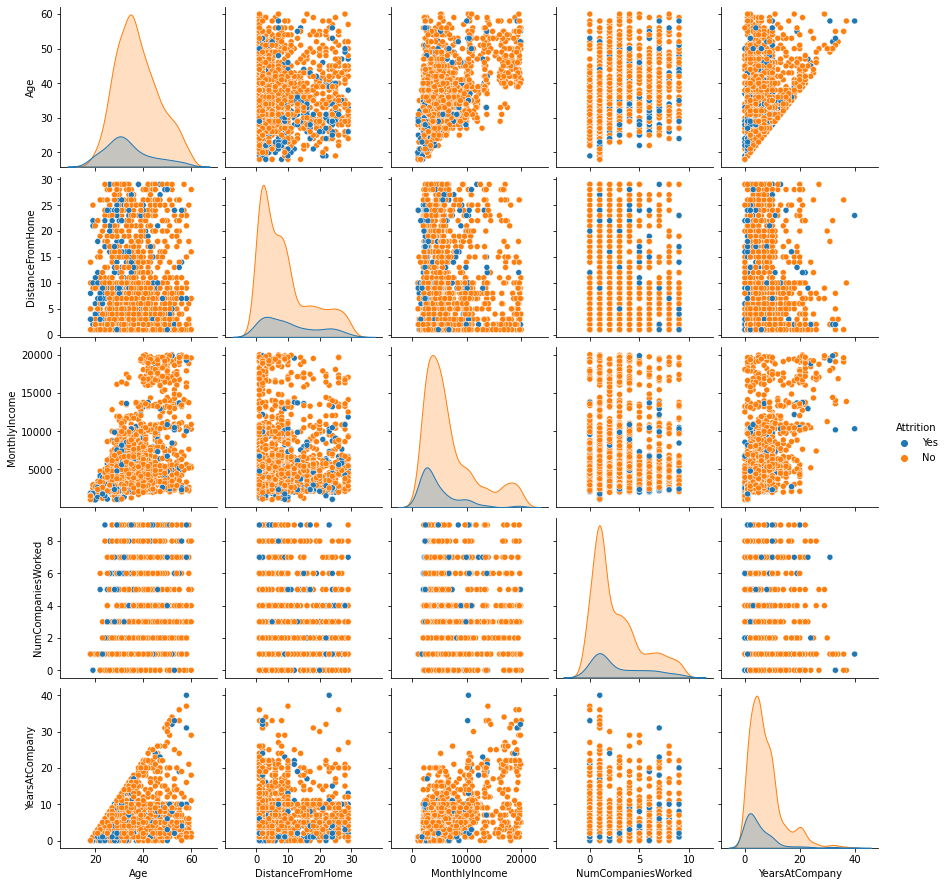

In [71]:
sns.pairplot(df1[new_num_list + ["Attrition"]], hue = "Attrition")

In [44]:
df[['Age']+['Attrition']]

,Age,Attrition
0,41,Yes
1,49,No
2,37,Yes
3,33,No
4,27,No
...,...,...
1465,36,No
1466,39,No
1467,27,No
1468,49,No


### Categorical Variables

In [79]:
cat_vars = ['Education',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'WorkLifeBalance',
 'Department',
 'MaritalStatus']

In [85]:
# Normalized values - categorical
for i in cat_vars:
    x = pd.crosstab(df1['Attrition'], df1[i])
    print(i)
    display(x.div(x.sum(axis=1), axis=0))

Education


Education,1,2,3,4,5
Attrition,,,,,
No,0.112733,0.193025,0.383617,0.275750,0.034874
Yes,0.130802,0.185654,0.417722,0.244726,0.021097


EnvironmentSatisfaction


EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
No,0.171938,0.197891,0.317113,0.313058
Yes,0.303797,0.181435,0.261603,0.253165


JobSatisfaction


JobSatisfaction,1,2,3,4
Attrition,,,,
No,0.180860,0.189781,0.299270,0.330089
Yes,0.278481,0.194093,0.308017,0.219409


WorkLifeBalance


WorkLifeBalance,1,2,3,4
Attrition,,,,
No,0.044607,0.231955,0.621249,0.102190
Yes,0.105485,0.244726,0.535865,0.113924


Department


Department,Human Resources,Research & Development,Sales
Attrition,,,
No,0.041363,0.671533,0.287105
Yes,0.050633,0.561181,0.388186


MaritalStatus


MaritalStatus,Divorced,Married,Single
Attrition,,,
No,0.238443,0.477697,0.283861
Yes,0.139241,0.354430,0.506329


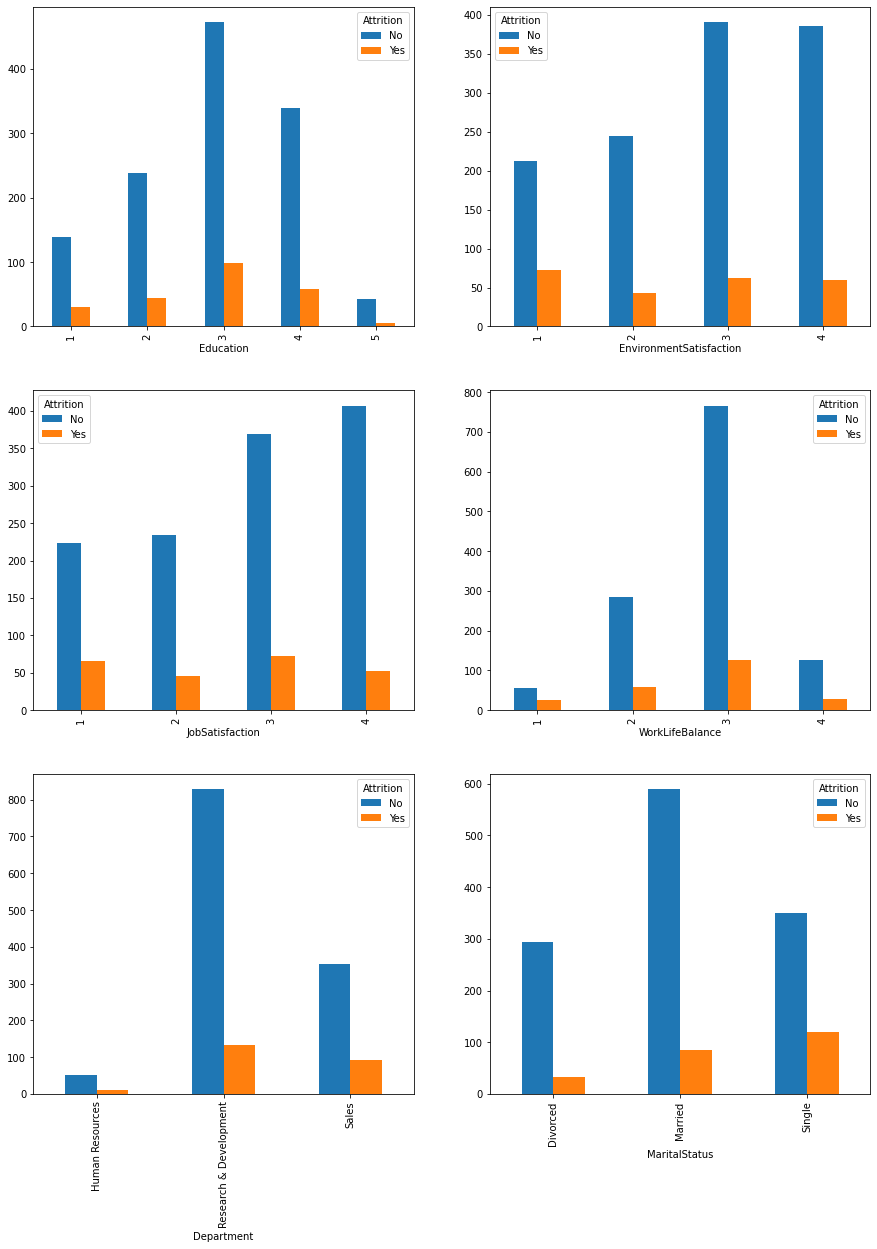

In [86]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (15,20))

for i,ax in zip(cat_vars, ax.ravel()):
    cat = pd.crosstab(df1['Attrition'], df1[i], margins = False)
    cat = cat.transpose()
    cat.plot(kind = 'bar', ax = ax)

Plots for MonthlyIncome


<AxesSubplot:title={'center':'Plots for Education and MonthlyIncome'}, xlabel='Education', ylabel='MonthlyIncome'>

<AxesSubplot:title={'center':'Plots for EnvironmentSatisfaction and MonthlyIncome'}, xlabel='EnvironmentSatisfaction', ylabel='MonthlyIncome'>

<AxesSubplot:title={'center':'Plots for JobSatisfaction and MonthlyIncome'}, xlabel='JobSatisfaction', ylabel='MonthlyIncome'>

<AxesSubplot:title={'center':'Plots for WorkLifeBalance and MonthlyIncome'}, xlabel='WorkLifeBalance', ylabel='MonthlyIncome'>

<AxesSubplot:title={'center':'Plots for Department and MonthlyIncome'}, xlabel='Department', ylabel='MonthlyIncome'>

<AxesSubplot:title={'center':'Plots for MaritalStatus and MonthlyIncome'}, xlabel='MaritalStatus', ylabel='MonthlyIncome'>

Plots for Age


<AxesSubplot:title={'center':'Plots for Education and Age'}, xlabel='Education', ylabel='Age'>

<AxesSubplot:title={'center':'Plots for EnvironmentSatisfaction and Age'}, xlabel='EnvironmentSatisfaction', ylabel='Age'>

<AxesSubplot:title={'center':'Plots for JobSatisfaction and Age'}, xlabel='JobSatisfaction', ylabel='Age'>

<AxesSubplot:title={'center':'Plots for WorkLifeBalance and Age'}, xlabel='WorkLifeBalance', ylabel='Age'>

<AxesSubplot:title={'center':'Plots for Department and Age'}, xlabel='Department', ylabel='Age'>

<AxesSubplot:title={'center':'Plots for MaritalStatus and Age'}, xlabel='MaritalStatus', ylabel='Age'>

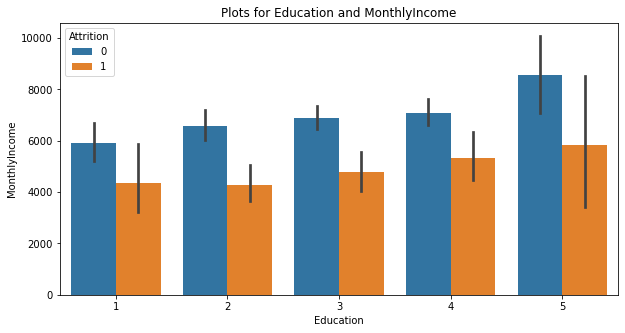

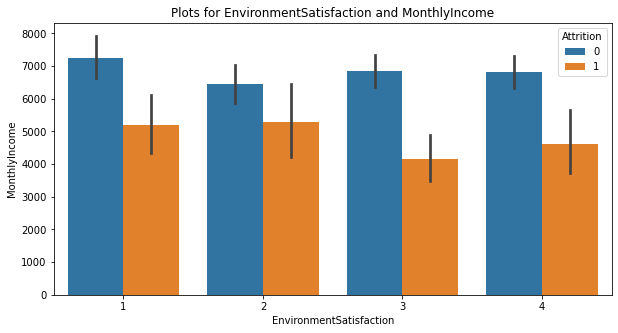

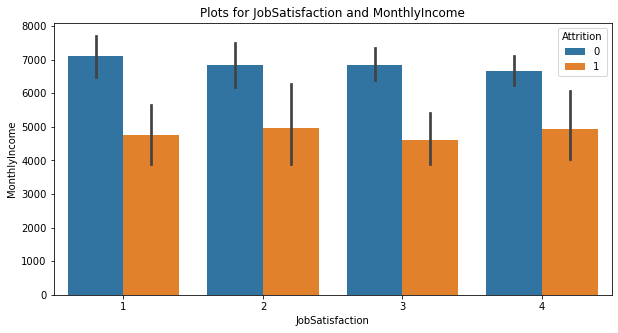

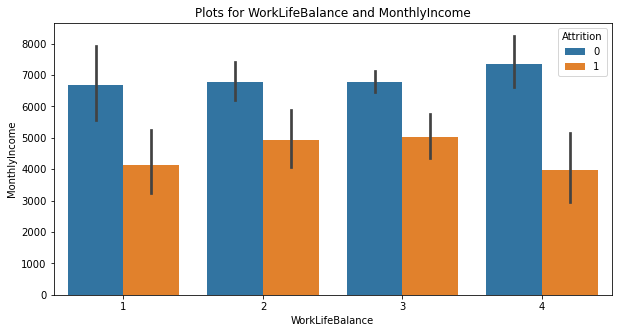

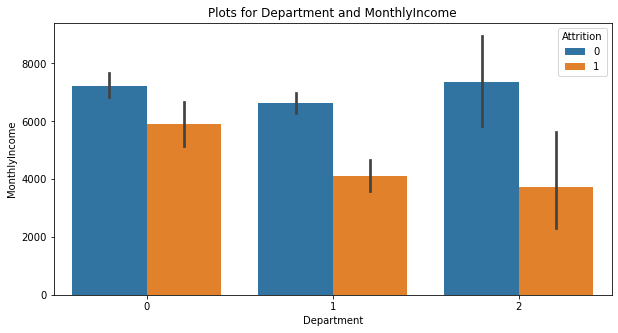

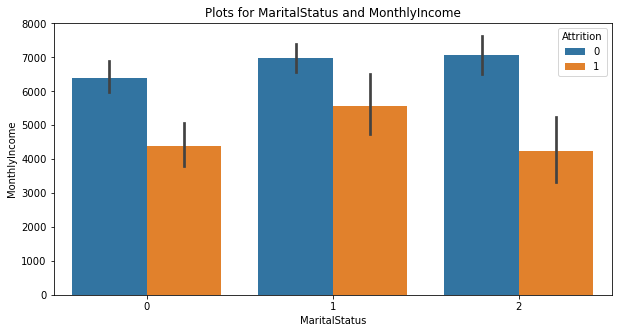

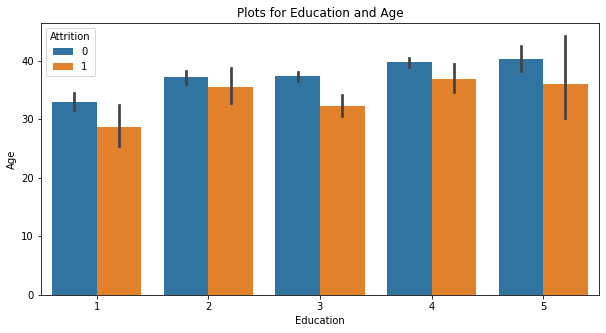

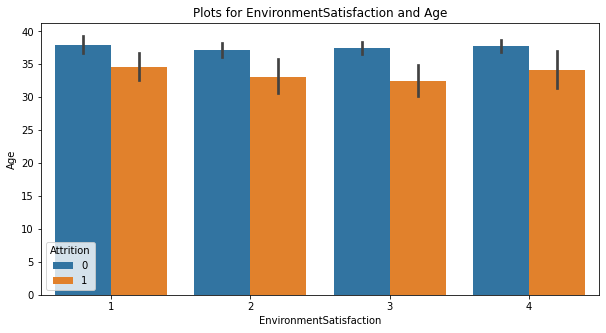

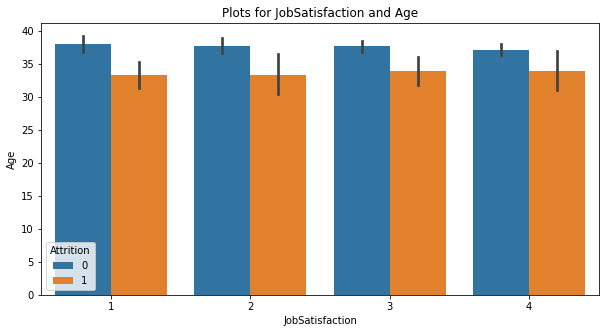

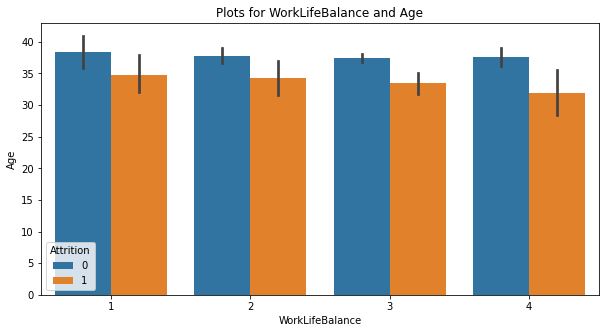

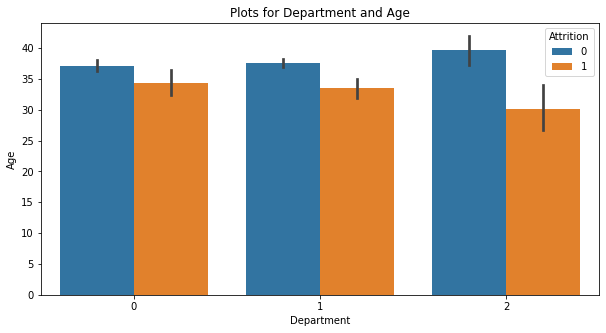

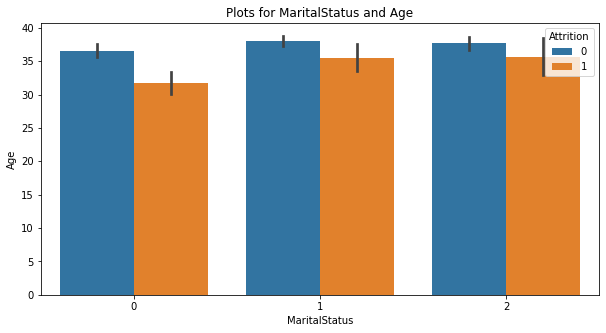

In [130]:
for i in ['MonthlyIncome', 'Age']:
    print("Plots for " + i)
    for j in cat_vars:
        plt.figure(figsize = (10,5))
        plt.title("Plots for " + j + " and " + i)
        plt.xlabel(i)
        plt.ylabel(j)
        display(sns.barplot(data = df1, x = j, y= i, hue = 'Attrition'))

 - As education increses, we see that the attrition increases with the group
 - It also increases with the married people
 - Attrition happens at same age group for education category

# DATA PREPARATION

## Data Transformation

In [121]:
attrition = {'Yes' : 1,
            'No' : 0}

df1['Attrition'] = df1['Attrition'].map(attrition)

In [126]:
Department = {'Sales':0, 
              'Research & Development':1, 
              'Human Resources':2}

df1['Department'] = df1['Department'].map(Department)

In [127]:
Education_field = {'Life Sciences':1, 
                   'Medical':2, 
                   'Marketing':3,
                   'Technical Degree':4, 
                   'Human Resources':5, 
                   'Other':0}

df1['EducationField'] = df1['EducationField'].map(Education_field)

In [128]:
Marital_status = {'Single':0,
                  'Married':1, 
                  'Divorced':2}

df1['MaritalStatus'] = df1['MaritalStatus'].map(Marital_status)

In [132]:
df1 = df1[['Age', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany', 'Attrition']]

In [133]:
df1.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition
0,41,0,1,2,1,2,4,0,5993,8,1,6,1
1,49,1,8,1,1,3,2,1,5130,1,3,10,0
2,37,1,2,2,0,4,3,0,2090,6,3,0,1
3,33,1,3,4,1,4,3,1,2909,1,3,8,0
4,27,1,2,1,2,1,2,1,3468,9,3,2,0


## Feature Selection

### 1. Filtration Methods

###### 1a. Correlation Analysis

<AxesSubplot:>

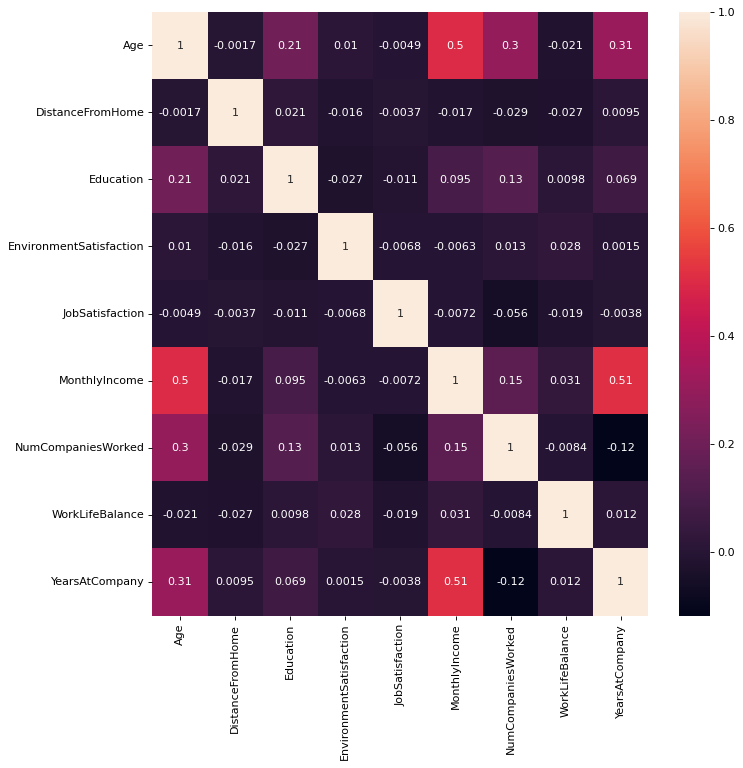

In [91]:
figure(figsize=(10, 10), dpi=80)
sns.heatmap(df1.corr(), annot = True)

In [195]:
# Selecting the best features by dividing the variables into X and y

X = df1.iloc[:,:-1]
y = df1['Attrition']

In [141]:
X.head()

,Age,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,0,1,2,1,2,4,0,5993,8,1,6
1,49,1,8,1,1,3,2,1,5130,1,3,10
2,37,1,2,2,0,4,3,0,2090,6,3,0
3,33,1,3,4,1,4,3,1,2909,1,3,8
4,27,1,2,1,2,1,2,1,3468,9,3,2


##### 1b. Chi squares

In [162]:
chi2_selector = SelectKBest(chi2, k=8)
chi2_selector.fit_transform(X, y)

array([[  41,    1,    1, ...,    0, 5993,    6],
       [  49,    8,    1, ...,    1, 5130,   10],
       [  37,    2,    0, ...,    0, 2090,    0],
       ...,
       [  27,    4,    1, ...,    1, 6142,    6],
       [  49,    2,    2, ...,    1, 5390,    9],
       [  34,    8,    2, ...,    1, 4404,    4]])

In [163]:
f = chi2_selector.get_support()
X_new_chi = X[X.columns[f]]

In [165]:
X_new_chi.columns

Index(['Age', 'DistanceFromHome', 'EducationField', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'YearsAtCompany'],
      dtype='object')

In [166]:
X.columns

Index(['Age', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'WorkLifeBalance',
       'YearsAtCompany'],
      dtype='object')

Certain columns does not seem to be of added value in the case of the seleckbest algorithm

##### 1c. Information Gain

Information gain calculates the reduction in entropy or surprise from transforming a dataset in some way.

Information Gain, or IG for short, measures the reduction in entropy or surprise by splitting a dataset according to a given value of a random variable.

In information theory, we like to describe the “surprise” of an event. Low probability events are more surprising therefore have a larger amount of information. Whereas probability distributions where the events are equally likely are more surprising and have larger entropy.

Skewed Probability Distribution (unsurprising): Low entropy.
Balanced Probability Distribution (surprising): High entropy.

In [177]:
#Information gain

importance = mutual_info_classif(X, y)
feat_imp = pd.Series(importance, X.columns)
feat_imp

Age                        0.024559
Department                 0.004074
DistanceFromHome           0.000000
Education                  0.003810
EducationField             0.000000
EnvironmentSatisfaction    0.003774
JobSatisfaction            0.000000
MaritalStatus              0.020224
MonthlyIncome              0.032741
NumCompaniesWorked         0.000000
WorkLifeBalance            0.022601
YearsAtCompany             0.028042
dtype: float64

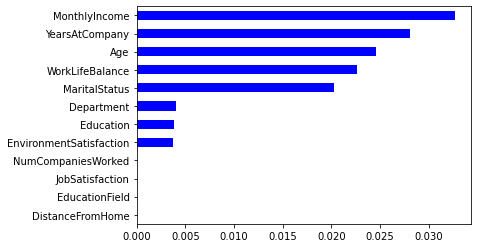

In [178]:
feat_imp.sort_values(ascending=True, inplace=True)
feat_imp.plot(kind = 'barh', color = 'blue')
plt.show()

##### 1d. Fischer's Score

In [200]:
fisher_rank = fisher_score.fisher_score(X, y)
fischer_imp = pd.Series(fisher_rank, X.columns)
fischer_imp

ValueError: Length of values (1) does not match length of index (12)

In [197]:
fischer_imp.sort_values(ascending=True, inplace=True)
fischer_imp.plot(kind = 'barh', color = 'blue')
plt.show()

NameError: name 'fischer_imp' is not defined

##### 1e. Variance Threshold

In [202]:
X_array = np.array(X)

In [207]:
Var_threshold = VarianceThreshold(threshold = 0.5)
Var_threshold.fit(X_array)

VarianceThreshold(threshold=0.5)

In [208]:
Var_threshold.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True])

### 2. Wrapper Methods

Wrappers require some method to search the space of all possible subsets of features, assessing their quality by learning and evaluating a classifier with that feature subset. The feature selection process is based on a specific machine learning algorithm that we are trying to fit on a given dataset. 

It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. 

The wrapper methods usually result in better predictive accuracy than filter methods.

In [431]:
#Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

##### 2a. Forward selection

In [268]:
lr = LogisticRegression(class_weight = 'balanced', solver = 'lbfgs', random_state = 42, n_jobs = -1, max_iter = 50)

In [290]:
forward = sfs(lr,
           k_features=8,
           forward=True,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

In [291]:
forward = forward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.1s finished

[2022-12-26 00:14:34] Features: 1/8 -- score: 0.8284944467297407[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.2s finished

[2022-12-26 00:14:35] Features: 2/8 -- score: 0.776676264911559[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/prepro

In [292]:
feat_cols = list(forward.k_feature_idx_)
print(feat_cols)

[1, 5, 6, 7, 8, 9, 10, 11]


In [303]:
forward_colnames = []
for i in feat_cols:
    forward_colnames.append(df1.columns[i])

In [304]:
forward_colnames

['Department',
 'EnvironmentSatisfaction',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'WorkLifeBalance',
 'YearsAtCompany']

##### 2b. Backward selection

In [293]:
#backward = SequentialFeatureSelector(lr, k_features = "best", forward = False, n_jobs = -1)

backward = sfs(lr,
           k_features=8,
           forward=False,
           floating=False,
           verbose=2,
           scoring='accuracy',
           cv=5)

In [294]:
backward = backward.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.3s finished

[2022-12-26 00:16:27] Features: 11/8 -- score: 0.6850843274372685[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.3s finished

[2022-12-26 00:16:28] Features: 10/8 -- score: 0.6914191690662278[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2022-12-26 00:16:28] Features: 9/8 -- score: 0.6941423282599753[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [295]:
back_cols = list(backward.k_feature_idx_)
print(back_cols)

[0, 1, 4, 6, 7, 8, 9, 11]


In [306]:
backward_colnames = []
for i in back_cols:
    backward_colnames.append(df1.columns[i])

In [307]:
backward_colnames

['Age',
 'Department',
 'EducationField',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'NumCompaniesWorked',
 'YearsAtCompany']

##### 2c. Exhaustive Feature Selection

In [296]:
exhaustive = ExhaustiveFeatureSelector(RandomForestClassifier(), min_features = 4, 
                                       max_features = 9, 
                                       scoring = 'roc_auc',
                                       print_progress  = True,
                                       cv = 2,
                                       n_jobs = -1)

In [297]:
exhaustive = exhaustive.fit(X_train,y_train)

Features: 3000/3718IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [298]:
exh_feat = X_train.columns[list(exhaustive.best_idx_)]

In [312]:
print(exhaustive.best_score_)

0.7327925608220394


In [299]:
print(exh_feat)

Index(['Age', 'Department', 'Education', 'EnvironmentSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')


In [315]:
print('Best accuracy score: %.2f' % exhaustive.best_score_)
print('Best subset (indices):', exhaustive.best_idx_)
print('Best subset (corresponding names):', exhaustive.best_feature_names_)

Best accuracy score: 0.73
Best subset (indices): (0, 1, 3, 5, 7, 8, 10, 11)
Best subset (corresponding names): ('Age', 'Department', 'Education', 'EnvironmentSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'WorkLifeBalance', 'YearsAtCompany')


##### 2d. Recursive Feature Elimination

Recursive Feature Elimination, or RFE for short, is a popular feature selection algorithm.

RFE is popular because it is easy to configure and use and because it is effective at selecting those features (columns) in a training dataset that are more or most relevant in predicting the target variable.

In [317]:
rfe = RFE(lr, n_features_to_select = 8)

In [321]:
rfe

RFE(estimator=LogisticRegression(class_weight='balanced', max_iter=50,
                                 n_jobs=-1, random_state=42),
    n_features_to_select=8)

In [318]:
rfe.fit(X_train, y_train)

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

RFE(estimator=LogisticRegression(class_weight='balanced', max_iter=50,
                                 n_jobs=-1, random_state=42),
    n_features_to_select=8)

In [319]:
y_pred = rfe.predict(X_train)

In [320]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

### 3. Embedded Methods

##### 3a. Lasso Regression

In [421]:
scaler = StandardScaler()

In [422]:
X_scaled = scaler.fit_transform(X)

In [423]:
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [424]:
lasso_logistic = LogisticRegression(C = 1, penalty = 'l1', solver = 'liblinear', random_state = 42)

In [425]:
model_lasso = SelectFromModel(lasso_logistic.fit(X_train_f, y_train_f), prefit = True, threshold = 0.1, importance_getter = 'auto')

In [426]:
model_lasso.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True])

In [427]:
#To see the features
X_train_f = pd.DataFrame(X_train_f)

we will do the model fitting and feature selection, altogether in one line of code. we use Lasso (L1) penalty for feature selection and we use the sklearn.SelectFromModel to select the features with non-zero coefficients

In [428]:
selected_feat = X_train_f.columns[(model_lasso.get_support())]

In [429]:
print('total features: {}'.format((X_train_f.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 12
selected features: 11


In [430]:
print(selected_feat)

Int64Index([0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')


##### 3b. Ridge Regression

In [432]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y, test_size=0.25, random_state=42)

In [438]:
scaler.fit(X_train_r, y_train_r)

StandardScaler()

In [450]:
ridge_logistic = LogisticRegression(C=1, penalty='l2', solver = 'liblinear', random_state = 42)

In [451]:
ridge_logistic.fit(X_train_r, y_train_r)

LogisticRegression(C=1, random_state=42, solver='liblinear')

In [452]:
ridge_logistic.coef_

array([[-2.23153318e-02, -2.40556013e-01,  2.88872764e-02,
         8.03192557e-02,  2.64292527e-01, -1.38539211e-01,
        -1.85405645e-01, -7.36642832e-01, -1.11598373e-04,
         1.37666489e-01, -8.98747594e-03, -2.32207520e-02]])

In [453]:
np.sum(ridge_logistic.coef_ >= 0)

4

In [454]:
importance = ridge_logistic.coef_[0]

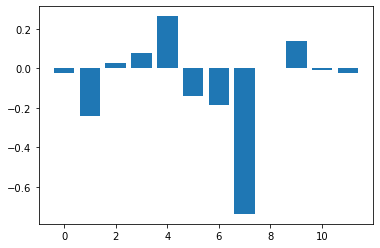

In [455]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()

##### 3c. Random Forest Feature Importance (Gini)

Random Forests is a kind of a Bagging Algorithm that aggregates a specified number of decision trees. The tree-based strategies used by random forests naturally rank by how well they improve the purity of the node, or in other words a decrease in the impurity (Gini impurity) over all trees. 

Nodes with the greatest decrease in impurity happen at the start of the trees, while notes with the least decrease in impurity occur at the end of trees. 

Thus, by pruning trees below a particular node, we can create a subset of the most important features.

In [385]:
rf_model = RandomForestClassifier(n_estimators = 340)

In [386]:
rf_model.fit(X,y)

RandomForestClassifier(n_estimators=340)

In [387]:
importance = rf_model.feature_importances_

In [407]:
rf_selected = pd.DataFrame({'Features': X.columns, 'Importance':importance})

In [408]:
rf_selected = rf_selected.sort_values('Importance')

([<matplotlib.axis.XTick at 0x7fa90a452fa0>,
 [Text(1, 0, 'Department'),
  Text(7, 0, 'MaritalStatus'),
  Text(10, 0, 'WorkLifeBalance'),
  Text(3, 0, 'Education'),
  Text(6, 0, 'JobSatisfaction'),
  Text(4, 0, 'EducationField'),
  Text(5, 0, 'EnvironmentSatisfaction'),
  Text(9, 0, 'NumCompaniesWorked'),
  Text(11, 0, 'YearsAtCompany'),
  Text(2, 0, 'DistanceFromHome'),
  Text(0, 0, 'Age'),
  Text(8, 0, 'MonthlyIncome')])

<Figure size 1080x720 with 0 Axes>

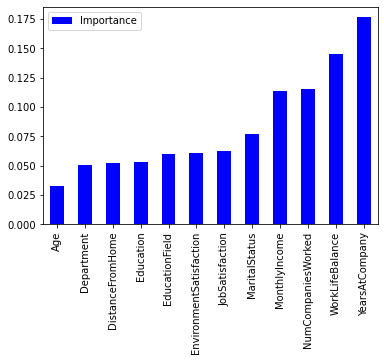

In [415]:
plt.figure(figsize=(15,10))
rf_selected.plot(kind = 'bar', color = 'blue')
plt.xticks(ticks = rf_selected.index ,labels = rf_selected.Features, rotation = 'vertical')

##### 3d. Elastic Net 

The main purpose of ElasticNet Regression is to find the coefficients that minimize the sum of error squares by applying a penalty to these coefficients. ElasticNet combines L1 and L2 (Lasso and Ridge) approaches. As a result, it performs a more efficient smoothing process. In another source, it is defined as follows:
 - It combines the L1 and L2 approaches.
 - It performs a more efficient regularization process.
 - It has two parameters to be set, λ and α.
 
The elastic net method improves on lasso’s limitations, i.e., where lasso takes a few samples for high dimensional data, the elastic net procedure provides the inclusion of “n” number of variables until saturation. In a case where the variables are highly correlated groups, lasso tends to choose one variable from such groups and ignore the rest entirely.

In [460]:
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y, test_size=0.25, random_state=42)

In [469]:
logistic_regression_classifier = LogisticRegressionCV(cv=3)

In [470]:
elastic_net_classifier = LogisticRegressionCV(cv=3, penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], solver='saga')

In [471]:
logistic_regression_classifier.fit(X_train_e, y_train_e)
elastic_net_classifier.fit(X_train_e, y_train_e)

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/kensaroven/opt/ana

LogisticRegressionCV(cv=3, l1_ratios=[0.1, 0.5, 0.9], penalty='elasticnet',
                     solver='saga')

In [472]:
print("Logistic Regression: {} || Elasticnet: {}".format(logistic_regression_classifier.score(X_test, y_test), elastic_net_classifier.score(X_test, y_test)))

Logistic Regression: 0.875 || Elasticnet: 0.8695652173913043


In [475]:
# Print out some more metrics
print("Logistic Regression")
print(classification_report(y_test, logistic_regression_classifier.predict(X_test)))
print("Elastic Net")
print(classification_report(y_test, elastic_net_classifier.predict(X_test)))

Logistic Regression
              precision    recall  f1-score   support

           0       0.88      1.00      0.93       320
           1       0.75      0.06      0.12        48

    accuracy                           0.88       368
   macro avg       0.81      0.53      0.52       368
weighted avg       0.86      0.88      0.83       368

Elastic Net
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       320
           1       0.00      0.00      0.00        48

    accuracy                           0.87       368
   macro avg       0.43      0.50      0.47       368
weighted avg       0.76      0.87      0.81       368



/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Background**
**Linear Approximation:**

Given a function, f(x), we can find its tangent at x=a. The equation of the tangent line L(x) is: L(x)=f(a)+f′(a)(x−a).

Take a look at the following graph of a function and its tangent line:

tangent line

From this graph we can see that near x=a, the tangent line and the function have nearly the same graph. On occasion, we will use the tangent line, L(x), as an approximation to the function, f(x), near x=a. In these cases, we call the tangent line the "Linear Approximation" to the function at x=a.

Quadratic Approximation:

Same as a linear approximation, yet this time we are dealing with a curve where we cannot find the point near to 0 by using only the tangent line.

Instead, we use the parabola as it's shown in the following graph:

quadratic function

In order to fit a good parabola, both parabola and quadratic function should have the same value, the same first derivative, AND the same second derivative. The formula will be (just out of curiosity): Qa(x) = f(a) + f'(a)(x-a) + f''(a)(x-a)2/2

Now we should be ready to do the comparison in detail.

**Comparison between the methods
### 1. Newton’s Method

Recall the motivation for the gradient descent step at x: we minimize the quadratic function (i.e. Cost Function).

Newton’s method uses in a sense a better quadratic function minimisation. It's better because it uses the quadratic approximation (i.e. first AND second partial derivatives).

You can imagine it as a twisted Gradient Descent with the Hessian (the Hessian is a square matrix of second-order partial derivatives of order n X n).

Moreover, the geometric interpretation of Newton's method is that at each iteration one approximates f(x) by a quadratic function around xn, and then takes a step towards the maximum/minimum of that quadratic function (in higher dimensions, this may also be a saddle point). Note that if f(x) happens to be a quadratic function, then the exact extremum is found in one step.

**Drawbacks:**

It’s computationally expensive because of the Hessian Matrix (i.e. second partial derivatives calculations).

It attracts to Saddle Points which are common in multivariable optimization (i.e. a point that its partial derivatives disagree over whether this input should be a maximum or a minimum point!).

### 2. Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm:

In a nutshell, it is an analogue of Newton’s Method, yet here the Hessian matrix is approximated using updates specified by gradient evaluations (or approximate gradient evaluations). In other words, using estimation to the inverse Hessian matrix.

The term Limited-memory simply means it stores only a few vectors that represent the approximation implicitly.

If I dare say that when the dataset is small, L-BFGS relatively performs the best compared to other methods especially because it saves a lot of memory, however, there are some “serious” drawbacks such that if it is unsafeguarded, it may not converge to anything.

Side note: This solver has become the default solver in sklearn LogisticRegression since version 0.22, replacing LIBLINEAR.

### 3. A Library for Large Linear Classification:

It’s a linear classification that supports logistic regression and linear support vector machines.

The solver uses a Coordinate Descent (CD) algorithm that solves optimization problems by successively performing approximate minimization along coordinate directions or coordinate hyperplanes.

LIBLINEAR is the winner of the ICML 2008 large-scale learning challenge. It applies automatic parameter selection (a.k.a L1 Regularization) and it’s recommended when you have high dimension dataset (recommended for solving large-scale classification problems)

**Drawbacks:**

It may get stuck at a non-stationary point (i.e. non-optima) if the level curves of a function are not smooth.

Also cannot run in parallel.

It cannot learn a true multinomial (multiclass) model; instead, the optimization problem is decomposed in a “one-vs-rest” fashion, so separate binary classifiers are trained for all classes.

Side note: According to Scikit Documentation: The “liblinear” solver was the one used by default for historical reasons before version 0.22. Since then, the default use is Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm.

### 4. Stochastic Average Gradient:

The SAG method optimizes the sum of a finite number of smooth convex functions. Like stochastic gradient (SG) methods, the SAG method's iteration cost is independent of the number of terms in the sum. However, by incorporating a memory of previous gradient values, the SAG method achieves a faster convergence rate than black-box SG methods.

It is faster than other solvers for large datasets when both the number of samples and the number of features are large.

**Drawbacks:**

It only supports L2 penalization.

This is not really a drawback, but more like a comparison: although SAG is suitable for large datasets, with a memory cost of O(N), it can be less practical for very large N (as the most recent gradient evaluation for each function needs to be maintained in the memory). This is usually not a problem, but a better option would be SVRG 1, 2 which is unfortunately not implemented in scikit-learn!

### 5. SAGA:

The SAGA solver is a variant of SAG that also supports the non-smooth penalty L1 option (i.e. L1 Regularization). This is therefore the solver of choice for sparse multinomial logistic regression. It also has a better theoretical convergence compared to SAG.

**Drawbacks:**

This is not really a drawback, but more like a comparison: SAGA is similar to SAG with regard to memory cost. That's it's suitable for large datasets, yet in edge cases where the dataset is very large, the SVRG 1, 2 would be a better option (unfortunately not implemented in scikit-learn)!
Side note: According to Scikit Documentation: The SAGA solver is often the best choice.

Please note the attributes "Large" and "Small" used in Scikit-Learn and in this comparison are relative. AFAIK, there is no universal unanimous and accurate definition of the dataset boundaries to be considered as "Large", "Too Large", "Small", "Too Small"...etc!

# MODEL TUNING / PREDICTIONS 

In [946]:
# Printing the relevant scores

def print_scores(test_data, test_pred, test_prob):
    # ROC- AUC score
    print("ROC-AUC score  test dataset:  \t", roc_auc_score(test_data,test_prob))
    
    #Precision score
    print("precision score  test dataset:  \t", precision_score(test_data,test_pred))

    #Recall Score
    print("Recall score  test dataset:  \t", recall_score(test_data,test_pred))

    #f1 score
    print("f1 score  test dataset :  \t", f1_score(test_data,test_pred)) 
    
    #Accuracy score
    print('Model accuracy score: {0:0.4f}\t'. format(accuracy_score(test_data, test_pred)))

In [1001]:
# Tuning using grid - Logistic
# Grid Search CV - Logistic

def grid_tuning_logistic(model_element, split, refit_score = 'precision_score'):
   
    #tuning weight for minority class then weight for majority class will be 1-weight of minority class
    
    # Create 5 fold cv
    fold = StratifiedKFold(n_splits = split, shuffle = True, random_state = 42)
    
    #Setting the range for class weights
    weights = np.linspace(0.0,0.99,500)

    #tuning weight for minority class then weight for majority class will be 1-weight of minority class
    param = {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'], "class_weight":[{0:x ,1:1.0 -x} for x in weights]}
    grid = GridSearchCV(estimator = model_element, param_grid = param, scoring = 'f1', cv = fold, refit=refit_score,
                    n_jobs = -1, return_train_score = True)
    #train model to learn relationships between x and y
    grid.fit(X_train,y_train)
     
    #Printing the best hyperparameters
    print("Best refit score:", refit_score)
    print("Best F1 score:", grid.best_score_)
    print("Best hyperparameter:", grid.best_params_)
    

In [1012]:
# Tuning using grid - Decision Tree
# Grid Search CV - Decision Tree

def grid_tuning_tree(model_element, split, refit_score = 'precision_score'):
    
    #scoring elements
    scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
    }
    #specifying all hyperparameters with possible values
    
    #tuning weight for minority class then weight for majority class will be 1-weight of minority class
    
    # Create 5 fold cv
    fold = StratifiedKFold(n_splits = split, shuffle = True, random_state = 42)
    
    #Setting the params for DT
    param = {
        'criterion':['gini', 'entropy'],
        'min_samples_split': [3, 5, 10], 
        'max_depth': [3, 5, 15, 25],
        'max_features': [3, 5, 10, 20]
        }
    grid = GridSearchCV(estimator = model_element, param_grid = param, scoring = scorers, cv = fold, 
                        refit=refit_score,n_jobs = -1, return_train_score = True)
    
    #train model to learn relationships between x and y
    grid.fit(X_train,y_train)
    
    #Printing the best hyperparameters
    print("Best refit score:", refit_score)
    print("Best F1 score:", grid.best_score_)
    print("Best hyperparameter:", grid.best_params_)
    

In [1061]:
# Tuning using grid - Random Forest
# Grid Search CV - Random Forest

def grid_tuning_rf(model_element, split, refit_score = 'precision_score'):
    
    #scoring elements
    scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
    }
    #specifying all hyperparameters with possible values
    
    #tuning weight for minority class then weight for majority class will be 1-weight of minority class
    
    # Create 5 fold cv
    fold = StratifiedKFold(n_splits = split, shuffle = True, random_state = 42)
    
    #Setting the params for RF
    param = {
        'criterion':['gini', 'entropy'],
        'n_estimators' : [100, 200, 300, 400, 500],
        'min_samples_split': [3, 5, 10], 
        'max_depth': [3, 5, 15, 25],
        'max_features': [3, 5, 10, 20]
        }
    grid = GridSearchCV(estimator = model_element, param_grid = param, scoring = scorers, cv = fold, 
                        refit=refit_score,n_jobs = -1, return_train_score = True)
    
    #train model to learn relationships between x and y
    grid.fit(X_train,y_train)
    
    #Printing the best hyperparameters
    print("Best refit score:", refit_score)
    print("Best F1 score:", grid.best_score_)
    print("Best hyperparameter:", grid.best_params_)
    

In [1129]:
# Tuning using grid - KNN
# Grid Search CV - KNN

def grid_tuning_knn(model_element, split, refit_score):
    
    #specifying all hyperparameters with possible values
    
    #tuning weight for minority class then weight for majority class will be 1-weight of minority class
    
    # Create 5 fold cv
    fold = StratifiedKFold(n_splits = split, shuffle = True, random_state = 42)
    
    #Setting the params for RF
    param = { 'n_neighbors' : ([3,5,7,9,10,12,14,16,17,19,20]),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
    
    grid = GridSearchCV(estimator = model_element, param_grid = param, scoring = 'f1', cv = fold, 
                        refit=refit_score,n_jobs = -1, return_train_score = True)
    
    #train model to learn relationships between x and y
    grid.fit(X_train,y_train)
    
    #Printing the best hyperparameters
    print("Best refit score:", refit_score)
    print("Best F1 score:", grid.best_score_)
    print("Best hyperparameter:", grid.best_params_)
    

In [690]:
# Threshold Evaluation

#define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [1029]:
# ROC-AUC Curves

def roc_auc_score_fn(test_data, test_proba):
    #roc curve estimates
    fpr, tpr, thresholds = roc_curve(test_data, test_proba)
    
    #ROC-AUC Curve
    score = roc_auc_score(test_data, test_proba)

    #Plotting the features
    plt.plot(fpr, tpr, linewidth=2, label = 'AUC (area = %0.2f)' % score)
    plt.plot([0, 1], [0, 1], 'r--') 
    plt.xlim(0,1)
    plt.ylim(0,1.15)
    plt.xlabel('False Positive rate (sens)')
    plt.ylabel('True Positive rate (1-spec)')
    plt.title("ROC-AUC Curve")
    plt.legend(loc = 'lower right')
    plt.show()

In [857]:
# Confusion Matrix

def cf_matrix(test_data, test_pred):
    conf = confusion_matrix(test_data, test_pred)
    
    # 1. CM
    print("Usual plot for Confusion Matrix")
    disp = ConfusionMatrixDisplay(confusion_matrix=conf)
    disp.plot(cmap=plt.cm.Blues, xticks_rotation=90)
    plt.figure(figsize=(8, 8), dpi = 80)
    display(plt.show())
    
    #2. CM
    print("Different plot for CF")
    ax = plt.subplot()
    sns.heatmap(conf, annot = True, fmt = 'g', ax=ax)
    ax.set_xlabel("Predictions")
    ax.set_ylabel("Actuals")
    ax.set_title("Confusion Matrix")
    plt.figure(figsize=(8, 8), dpi = 80)
    display(plt.show())

In [904]:
# Precision Recall curves

def plot_precision_recall_vs_thresholds(test_data, pred_proba, t):
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_prob_test)                        
    
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.legend(loc = 'best')
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    display(plt.show())
    
    # Usual way
    plt.figure(figsize=(8, 8), dpi = 80)
    plt.step(recalls, precisions, color='b', alpha=0.2, where='post')
    plt.fill_between(recalls, precisions, step='post', alpha=0.2, color='b')
    plt.ylim([0, 1.01])
    plt.xlim([0, 1.01])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    #Params for finding the optimal threshold
    close_default_clf = np.argmin(np.abs(thresholds - t))
    #plot threshold on line
    plt.plot(recalls[close_default_clf], precisions[close_default_clf], '^', c='k', markersize=15)
    display(plt.show())
    
    #Precision-Recall graph - Quicker
    #Average precision score evaluation
    ap = average_precision_score(test_data, pred_proba)
    prd = PrecisionRecallDisplay(precisions, recalls, average_precision=ap)
    display(prd.plot())

## 1. LOGISTIC REGRESSION

##### Building a logistic classification model

In [743]:
X = df1.drop(columns = ['Attrition'])

In [744]:
X.shape

(1470, 12)

In [745]:
y = df1['Attrition']

In [746]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,train_size=0.8)

In [747]:
#get shape of train and test data
print("train size X : ",X_train.shape)
print("train size y : ",y_train.shape)
print("test size X : ",X_test.shape)
print("test size y : ",y_test.shape)

train size X :  (1176, 12)
train size y :  (1176,)
test size X :  (294, 12)
test size y :  (294,)


In [748]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [749]:
#Checking for class imbalance
y_train.value_counts(normalize = True)

0    0.831633
1    0.168367
Name: Attrition, dtype: float64

We see that there is a potential class imbalance in this data set based on the target variable.

There are a variety of approaches to dealing with class imbalance, such as increasing minority class samples or decreasing majority class samples to ensure that both classes have the same distribution.

Because we’re using the Scikit-learn machine library to create the model, it has a logistic regression implementation that supports class weighting. We will use the inbuilt parameter “class_weight” while creating an instance of the Logistic Regression model.

Both the majority and minority classes will be given separate weights. During the training phase, the weight differences will influence the classification of the classes.

The purpose of adding class weights is to penalize the minority class for misclassification by setting a higher class weight while decreasing the weight for the majority class.

In [750]:
logistic = LogisticRegression(class_weight = {0:0.83, 1:0.17})

In [751]:
logistic.fit(X_train, y_train)

LogisticRegression(class_weight={0: 0.83, 1: 0.17})

In [752]:
y_pred = logistic.predict(X_test)

To evaluate performance or our model we will be using “f1 score” as this is a class imbalance problem using accuracy as a performance metrics is not good also, we can say that f1 score is the go-to metric when we have a class imbalance problem

In [753]:
print("f1 score is:", f1_score(y_test, y_pred, pos_label = 0))

f1 score is: 0.9289617486338798


 * pos_label - decides which class of the binary variable to be used for printing the  f1 score
 * average{‘micro’, ‘macro’, ‘samples’, ‘weighted’, ‘binary’} or None, default=’binary’
   This parameter is required for multiclass/multilabel targets. If None, the scores for each class are returned. Otherwise, this determines the type of averaging performed on the data:

In [754]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       255
           1       0.00      0.00      0.00        39

    accuracy                           0.87       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.75      0.87      0.81       294



/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Usual plot for Confusion Matrix


<Figure size 640x480 with 0 Axes>

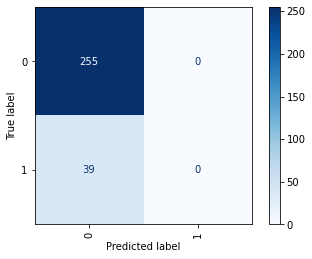

None

Different plot for CF


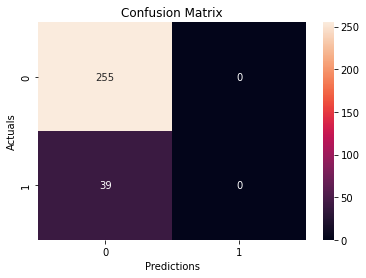

None

In [846]:
figure(figsize=(8, 6), dpi=80)
cf_matrix(y_test, y_pred)

In [757]:
#predited probabilities
y_pred_prob_test_base = logistic.predict_proba(X_test)[:,1]

In [852]:
#Printing scores
print_scores(y_test, y_pred, y_pred_prob_test_base)

ROC-AUC score  test dataset:  	 0.7285067873303168
precision score  test dataset:  	 0.0
Recall score  test dataset:  	 0.0
f1 score  test dataset :  	 0.0
Model accuracy score: 0.8673


/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Really bad scores for the model, let us tune the parameters

##### Hyper parameter optimization

Model parameters (such as weight, bias, and so on) are learned from data, whereas hyperparameters specify how our model should be organized. 

The process of finding the optimum fit or ideal model architecture is known as hyperparameter tuning. Hyperparameters control the overfitting or underfitting of the model. 

Hyperparameter tuning can be done using algorithms like Grid Search or Random Search.

To tune hyperparameters, follow the steps below:

- Create a model instance of the Logistic Regression class
- Specify hyperparameters with all possible values
- Define performance evaluation metrics
- Apply cross-validation
- Train the model using the training dataset
- Determine the best values for the hyperparameters given.

**KFold** is a cross-validator that divides the dataset into k folds.

**Stratified** is to ensure that each fold of dataset has the same proportion of observations with a given label - **used for imbalanced datasets**

In [924]:
# define model/create instance
lr = LogisticRegression()

In [1003]:
grid_tuning_logistic(lr, 5, refit_score = 'precision_score')

Best refit score: precision_score
Best F1 score: 0.4223716241383647
Best hyperparameter: {'C': 0.1, 'class_weight': {0: 0.1785571142284569, 1: 0.8214428857715431}, 'penalty': 'l2'}


/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15000 fits failed out of a total of 30000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15000 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/line

In [ ]:
#weights = np.linspace(0.0,0.99,500)

In [ ]:
#param = {'C': [0.1, 0.5, 1,10,15,20], 'penalty': ['l1', 'l2'], "class_weight":[{0:x ,1:1.0 -x} for x in weights]}

In [ ]:
# Create 5 fold cv
#fold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

In [ ]:
#Gridsearch for hyperparameter tuning
#grid = GridSearchCV(estimator = lr, param_grid = param, scoring = 'precision_score', cv = fold, return_train_score = True)

In [ ]:
#train model to learn relationships between x and y
#grid.fit(X_train,y_train)

In [ ]:
#Printing the best hyperparameters
#print("Best F1 score:", grid.best_score_)
#print("Best hyperparameter:", grid.best_params_)

C is referred to as a "hyperparameter". Hyperparameters tell the model how to choose parameters.

A high value of C tells the model to give high weight to the training data, and a lower weight to the complexity penalty. A low value tells the model to give more weight to this complexity penalty at the expense of fitting to the training data. 

**Basically, a high C means "Trust this training data a lot", while a low value says "This data may not be fully representative of the real world data, so if it's telling you to make a parameter really large, don't listen to it".**

##### Selecting the optimal model based on tuned grid

In [940]:
#Building Model again with best params
lr2 = LogisticRegression(C= 0.1, class_weight={0:0.178,1:0.821}, penalty = 'l2')
lr2.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight={0: 0.178, 1: 0.821})

In [941]:
# predict probabilities on Test and take probability for class 1([:1])
y_pred_prob_test = lr2.predict_proba(X_test)[:, 1]

In [942]:
#predict labels on test dataset
y_pred_test = lr2.predict(X_test)

### Model Evaluation

##### Confusion Matrix

Usual plot for Confusion Matrix


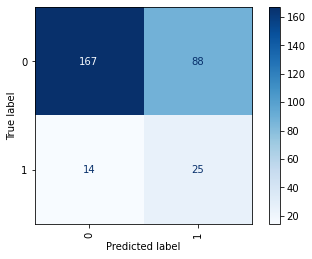

<Figure size 640x640 with 0 Axes>

None

Different plot for CF


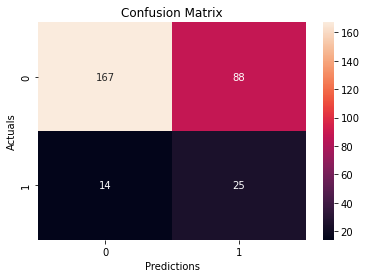

<Figure size 640x640 with 0 Axes>

None

In [943]:
#Confusion Matrix
cf_matrix(y_test, y_pred_test)

##### Precision Recall Curve

For both the precision recall curve and roc curve always pass the predicted probas of X_test 

/var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/ipykernel_1178/766251215.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)


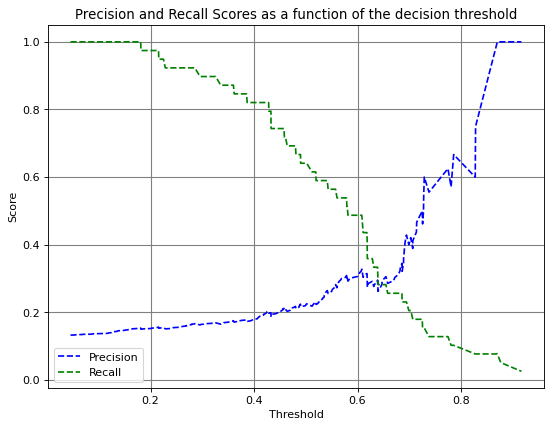

None

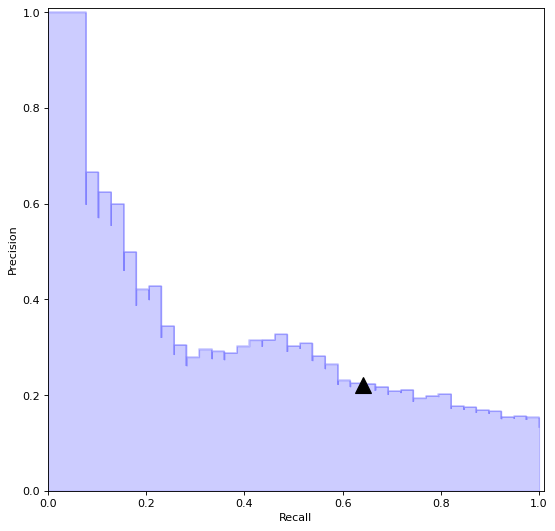

None

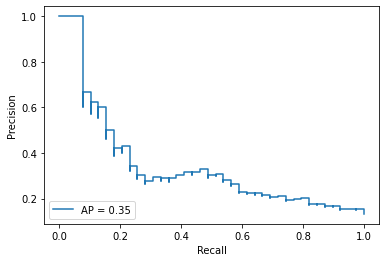

In [948]:
figure(figsize=(8, 6), dpi=80)
plot_precision_recall_vs_thresholds(y_test, y_pred_prob_test, 0.5)

In [949]:
evaluate_threshold(0.5)

IndexError: boolean index did not match indexed array along dimension 0; dimension is 64 but corresponding boolean dimension is 294

In [692]:
evaluate_threshold(0.2)

Sensitivity: 0.9230769230769231
Specificity: 0.29803921568627456


In [693]:
evaluate_threshold(0.85)

Sensitivity: 0.07692307692307693
Specificity: 1.0


##### ROC Curve

For both the precision recall curve and roc curve always pass the predicted probas of X_test 

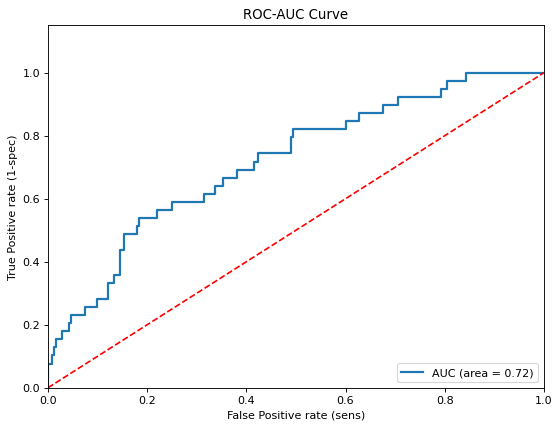

In [1030]:
figure(figsize=(8, 6), dpi=80)
roc_auc_score_fn(y_test, y_pred_prob_test)

##### Metrics

In [951]:
#Printing scores for tuned model
print_scores(y_test, y_pred_test, y_pred_prob_test)

ROC-AUC score  test dataset:  	 0.7173453996983409
precision score  test dataset:  	 0.22123893805309736
Recall score  test dataset:  	 0.6410256410256411
f1 score  test dataset :  	 0.32894736842105265
Model accuracy score: 0.6531	


In [952]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.65      0.77       255
           1       0.22      0.64      0.33        39

    accuracy                           0.65       294
   macro avg       0.57      0.65      0.55       294
weighted avg       0.83      0.65      0.71       294



The classification summary looks reasonable for this classification

In [953]:
logit_model=sm.Logit(y,X)

In [570]:
result=logit_model.fit()

Optimization terminated successfully.
         Current function value: 0.387437
         Iterations 7


In [571]:
print(result.summary2())

                            Results: Logit
Model:                Logit              Pseudo R-squared:   0.123     
Dependent Variable:   Attrition          AIC:                1163.0662 
Date:                 2022-12-27 02:16   BIC:                1226.5824 
No. Observations:     1470               Log-Likelihood:     -569.53   
Df Model:             11                 LL-Null:            -649.29   
Df Residuals:         1458               LLR p-value:        1.6805e-28
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       7.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Age                     -0.0168   0.0092 -1.8305 0.0672 -0.0348  0.0012
Department              -0.2577   0.1390 -1.8536 0.0638 -0.5301  0.0148
DistanceFromHome     

## 2. DECISION TREES

##### Building a decision tree model

In [977]:
# Model element
dtree = DecisionTreeClassifier(criterion='gini', random_state=0)

In [978]:
# Model fitting
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [979]:
#Model predictions
pred_tree = dtree.predict(X_test)

In [980]:
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86       255
           1       0.19      0.23      0.21        39

    accuracy                           0.77       294
   macro avg       0.53      0.54      0.53       294
weighted avg       0.79      0.77      0.78       294



Usual plot for Confusion Matrix


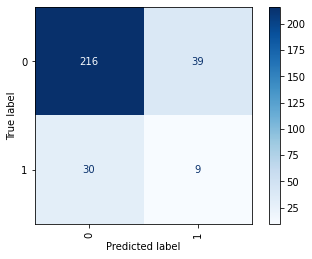

<Figure size 640x640 with 0 Axes>

None

Different plot for CF


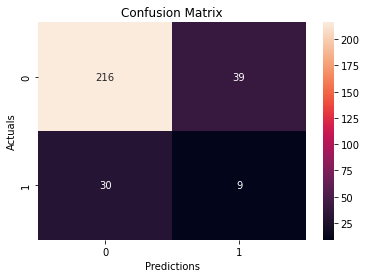

<Figure size 640x640 with 0 Axes>

None

In [981]:
#Confusion Matrix
cf_matrix(y_test, pred_tree)

In [982]:
y_pred_prob_tree = dtree.predict_proba(X_test)[:,1]

In [983]:
dtree.score(X_test, y_test)

0.7653061224489796

In [984]:
tree_class = export_text(dtree, feature_names = list(X))

In [985]:
print(tree_class)

|--- MonthlyIncome <= -0.84
|   |--- MaritalStatus <= -0.58
|   |   |--- YearsAtCompany <= -0.89
|   |   |   |--- Age <= 0.46
|   |   |   |   |--- Age <= -1.99
|   |   |   |   |   |--- MonthlyIncome <= -1.08
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- MonthlyIncome >  -1.08
|   |   |   |   |   |   |--- EnvironmentSatisfaction <= 0.74
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- EnvironmentSatisfaction >  0.74
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- Age >  -1.99
|   |   |   |   |   |--- Age <= -1.88
|   |   |   |   |   |   |--- Department <= -0.45
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Department >  -0.45
|   |   |   |   |   |   |   |--- MonthlyIncome <= -1.08
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- MonthlyIncome >  -1.08
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- Age >  -1.88
|   |   |   |   |   |   |--- class: 1
|   |   

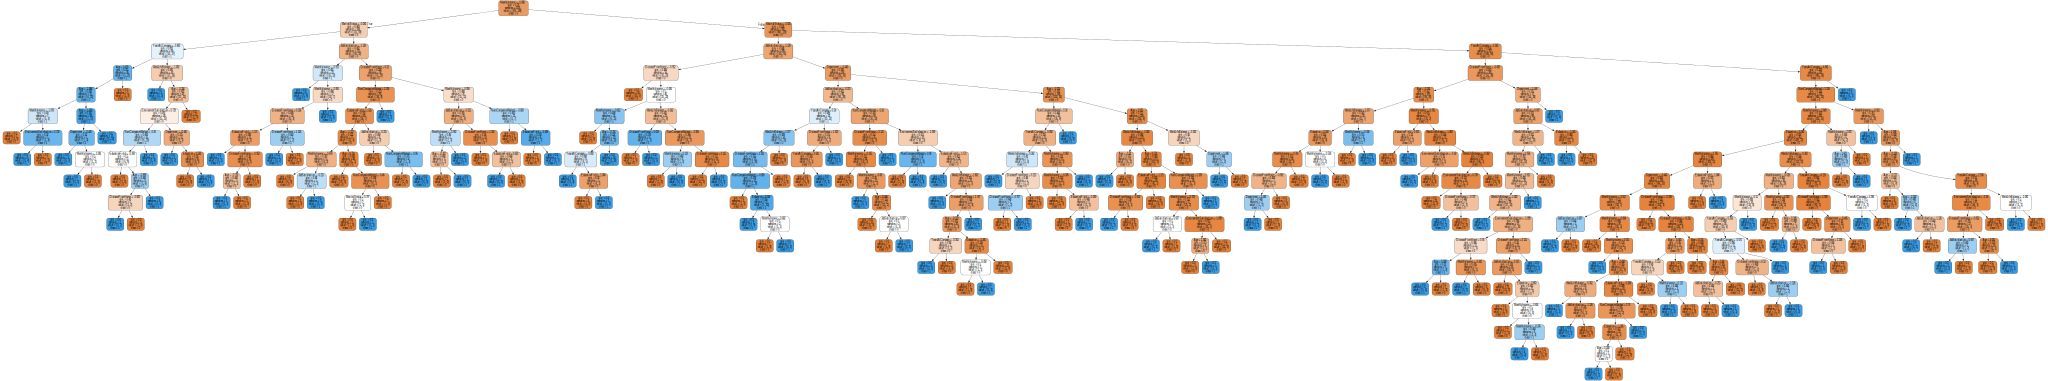

In [986]:
tree_data = export_graphviz(dtree, 
                feature_names = list(X.columns), 
                class_names = ['0', '1'],
                filled = True,
                rounded = True,
                special_characters = True,
                out_file = None
               )
graph = graphviz.Source(tree_data)
graph

In [987]:
# Printing scores
print_scores(y_test, pred_tree, y_pred_prob_tree)

ROC-AUC score  test dataset:  	 0.5389140271493214
precision score  test dataset:  	 0.1875
Recall score  test dataset:  	 0.23076923076923078
f1 score  test dataset :  	 0.20689655172413793
Model accuracy score: 0.7653	


##### **Hyper parameters tuning** - Let try tuning the model and enhancing the results

In [1034]:
dt = DecisionTreeClassifier(random_state = 42)

In [1035]:
grid_tuning_tree(dt, 5, refit_score = 'precision_score')

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Best refit score: precision_score
Best F1 score: 0.5844155844155844
Best hyperparameter: {'criterion': 'gini', 'max_depth': 3, 'max_features': 20, 'min_samples_split': 3}


In [1036]:
dtree2 = DecisionTreeClassifier(criterion = 'gini', 
                             max_depth = 3, 
                             max_features = 20, 
                             min_samples_split = 3, 
                             random_state = 42)

In [1037]:
# Model fitting
dtree2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=20, min_samples_split=3,
                       random_state=42)

In [1038]:
#Model predictions
dtree2_pred = dtree2.predict(X_test)

In [1039]:
dtree2_pred_proba = dtree2.predict_proba(X_test)[:,1]

### Model Evaluations

##### Confusion Matrix

Usual plot for Confusion Matrix


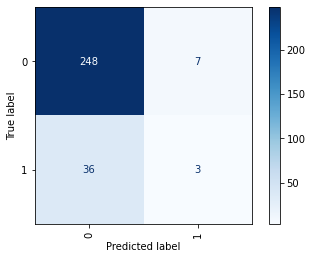

<Figure size 640x640 with 0 Axes>

None

Different plot for CF


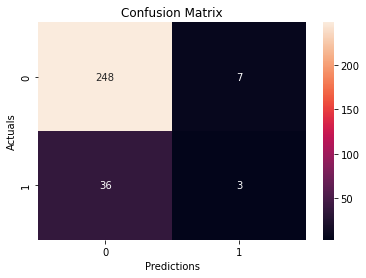

<Figure size 640x640 with 0 Axes>

None

In [1041]:
#Confusion Matrix
cf_matrix(y_test, dtree2_pred)

##### Precision Recall Curve

For both the precision recall curve and roc curve always pass the predicted probas of X_test 

/var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/ipykernel_1178/766251215.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)


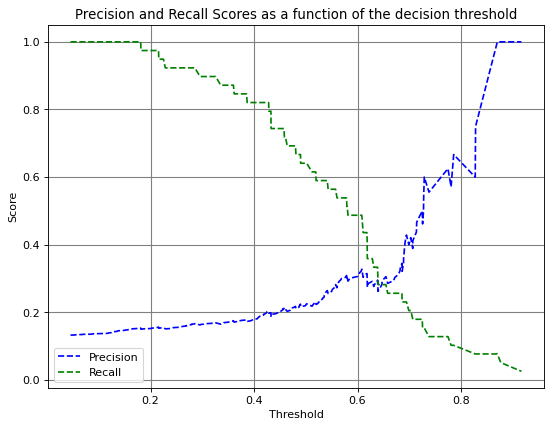

None

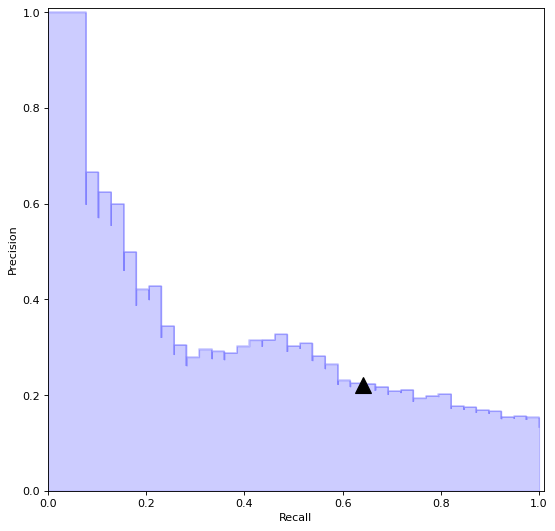

None

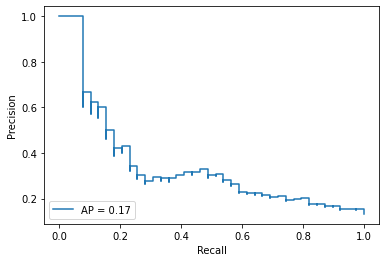

In [1042]:
figure(figsize=(8, 6), dpi=80)
plot_precision_recall_vs_thresholds(y_test, dtree2_pred_proba, 0.5)

##### ROC Curve

For both the precision recall curve and roc curve **always pass the predicted probas of X_test**

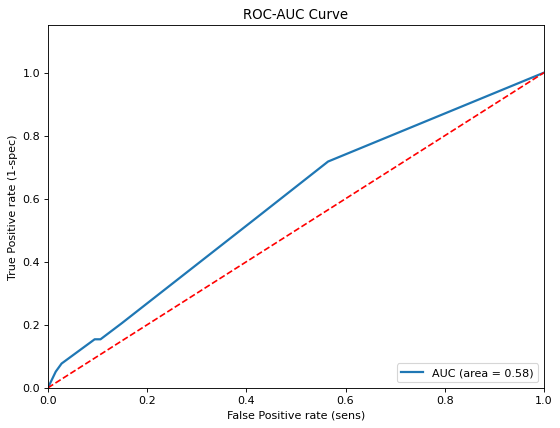

In [1043]:
figure(figsize=(8, 6), dpi=80)
roc_auc_score_fn(y_test, dtree2_pred_proba)

##### Metrics

In [1027]:
#Printing scores for tuned model
print_scores(y_test, y_pred_test, dtree2_pred_proba)

ROC-AUC score  test dataset:  	 0.5840623428858723
precision score  test dataset:  	 0.22123893805309736
Recall score  test dataset:  	 0.6410256410256411
f1 score  test dataset :  	 0.32894736842105265
Model accuracy score: 0.6531	


In [1025]:
print(classification_report(y_test, dtree2_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       255
           1       0.30      0.08      0.12        39

    accuracy                           0.85       294
   macro avg       0.59      0.52      0.52       294
weighted avg       0.80      0.85      0.81       294



## 3. RANDOM FOREST

In [1049]:
# Model element
rf_tree = RandomForestClassifier(criterion='gini', random_state=42)

In [1050]:
# Model fitting
rf_tree.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [1051]:
#Model predictions
pred_rf_tree = rf_tree.predict(X_test)

In [1052]:
print(classification_report(y_test, pred_rf_tree))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.50      0.13      0.20        39

    accuracy                           0.87       294
   macro avg       0.69      0.55      0.57       294
weighted avg       0.83      0.87      0.83       294



Usual plot for Confusion Matrix


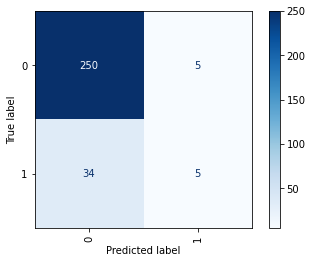

<Figure size 640x640 with 0 Axes>

None

Different plot for CF


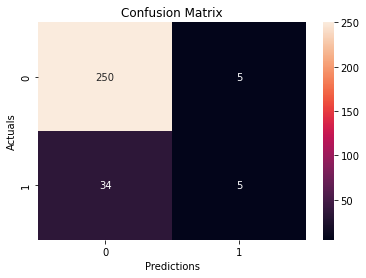

<Figure size 640x640 with 0 Axes>

None

In [1053]:
#Confusion Matrix
cf_matrix(y_test, pred_rf_tree)

In [1054]:
y_pred_prob_rf_tree = rf_tree.predict_proba(X_test)[:,1]

In [1055]:
rf_tree.score(X_test, y_test)

0.8673469387755102

In [1057]:
# Printing scores
print_scores(y_test, pred_rf_tree, y_pred_prob_rf_tree)

ROC-AUC score  test dataset:  	 0.6972850678733032
precision score  test dataset:  	 0.5
Recall score  test dataset:  	 0.1282051282051282
f1 score  test dataset :  	 0.2040816326530612
Model accuracy score: 0.8673	


##### **Hyper parameters tuning** - Let try tuning the model and enhancing the results for random forest

In [1058]:
rf = RandomForestClassifier(random_state = 42)

In [1062]:
grid_tuning_rf(rf, 5, refit_score = 'precision_score')

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn

/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kensaroven/opt/anaconda3/lib/python3.9/site-packages/sklearn

Best refit score: precision_score
Best F1 score: 0.8892857142857142
Best hyperparameter: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 5, 'min_samples_split': 3, 'n_estimators': 200}


In [1063]:
rf_tree2 = RandomForestClassifier(criterion = 'gini', 
                             max_depth = 3, 
                             max_features = 20, 
                             min_samples_split = 3, 
                             random_state = 42)

In [1064]:
# Model fitting
rf_tree2.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=20, min_samples_split=3,
                       random_state=42)

In [1065]:
#Model predictions
rf_tree2_pred = rf_tree2.predict(X_test)

In [1066]:
rf_tree2_pred_proba = rf_tree2.predict_proba(X_test)[:,1]

### Model Evaluations

##### Confusion Matrix

Usual plot for Confusion Matrix


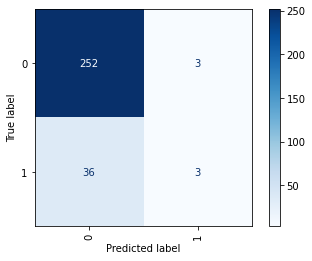

<Figure size 640x640 with 0 Axes>

None

Different plot for CF


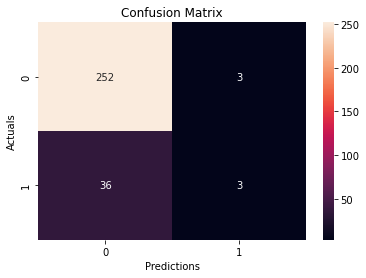

<Figure size 640x640 with 0 Axes>

None

In [1067]:
#Confusion Matrix
cf_matrix(y_test, rf_tree2_pred)

##### Precision Recall Curve

For both the precision recall curve and roc curve always pass the predicted probas of X_test 

/var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/ipykernel_1178/766251215.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)


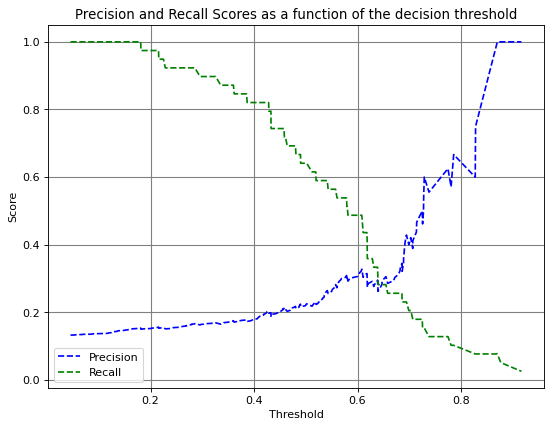

None

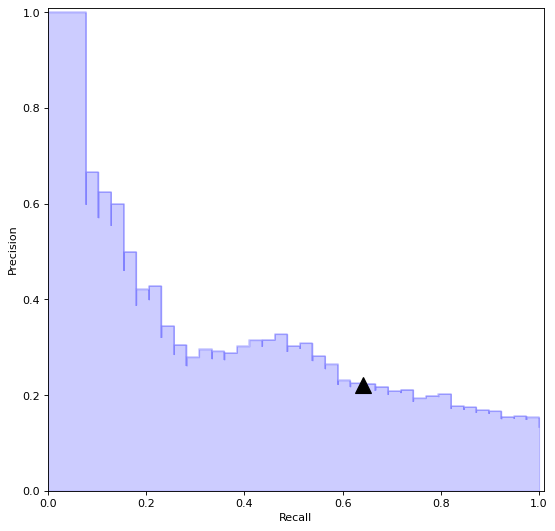

None

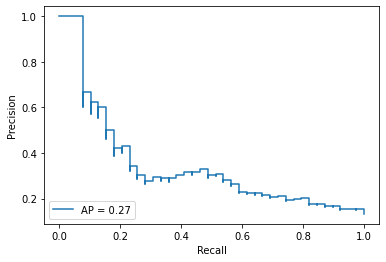

In [1068]:
figure(figsize=(8, 6), dpi=80)
plot_precision_recall_vs_thresholds(y_test, rf_tree2_pred_proba, 0.5)

##### ROC Curve

For both the precision recall curve and roc curve **always pass the predicted probas of X_test**

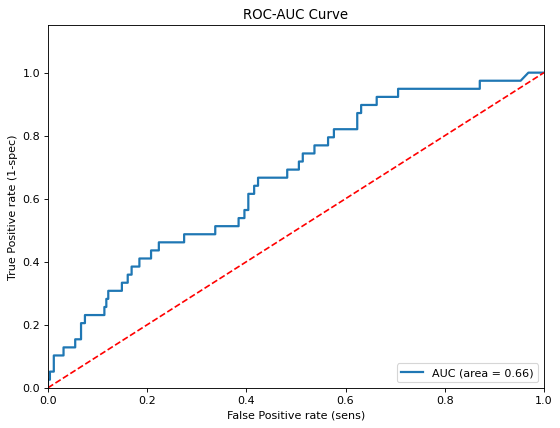

In [1069]:
figure(figsize=(8, 6), dpi=80)
roc_auc_score_fn(y_test, rf_tree2_pred_proba)

##### Metrics

In [1077]:
#Printing scores for tuned model
print_scores(y_test, rf_tree2_pred, rf_tree2_pred_proba)

ROC-AUC score  test dataset:  	 0.664957264957265
precision score  test dataset:  	 0.5
Recall score  test dataset:  	 0.07692307692307693
f1 score  test dataset :  	 0.13333333333333336
Model accuracy score: 0.8673	


In [1076]:
print(classification_report(y_test, rf_tree2_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.50      0.08      0.13        39

    accuracy                           0.87       294
   macro avg       0.69      0.53      0.53       294
weighted avg       0.83      0.87      0.82       294



## 4. KNN

In [1107]:
knn_class = KNeighborsClassifier(n_neighbors = 3)

In [1108]:
#Fitting model
knn_class.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [1109]:
#Model predictions
pred_knn = knn_class.predict(X_test)

In [1110]:
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       255
           1       0.21      0.10      0.14        39

    accuracy                           0.83       294
   macro avg       0.54      0.52      0.52       294
weighted avg       0.78      0.83      0.80       294



Usual plot for Confusion Matrix


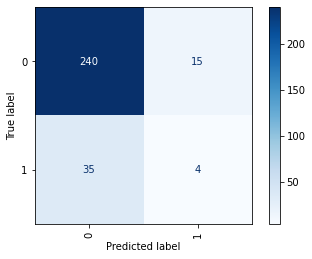

<Figure size 640x640 with 0 Axes>

None

Different plot for CF


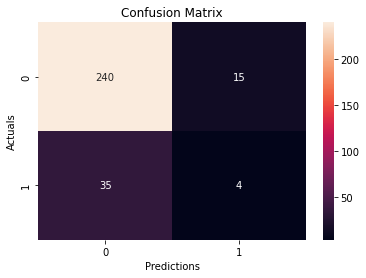

<Figure size 640x640 with 0 Axes>

None

In [1095]:
#Confusion Matrix
cf_matrix(y_test, pred_knn)

In [1111]:
y_pred_prob_knn = knn_class.predict_proba(X_test)[:,1]

In [1112]:
knn_class.score(X_test, y_test)

0.8299319727891157

In [1098]:
# Printing scores
print_scores(y_test, pred_knn, y_pred_prob_knn)

ROC-AUC score  test dataset:  	 0.5596782302664655
precision score  test dataset:  	 0.21052631578947367
Recall score  test dataset:  	 0.10256410256410256
f1 score  test dataset :  	 0.13793103448275865
Model accuracy score: 0.8299	


In [1113]:
# Let us observe the variation in the KNN based on neighbours
knn_acc_scores = []

for i in range(1,20,1):
    knn_cl = KNeighborsClassifier(n_neighbors = i)
    knn_cl.fit(X_train, y_train)
    
    # Score calculation
    train_score = knn_cl.score(X_train, y_train)
    test_score = knn_cl.score(X_test, y_test)
    
    knn_acc_scores.append([i, train_score, test_score])

knn_df = pd.DataFrame(knn_acc_scores, columns = ['K', 'Train Scores', 'Test Scores'])
knn_df  
  

,K,Train Scores,Test Scores
0,1,1.000000,0.809524
1,2,0.875000,0.853741
2,3,0.864796,0.829932
3,4,0.852041,0.860544
4,5,0.853741,0.853741
5,6,0.845238,0.867347
6,7,0.847789,0.867347
7,8,0.844388,0.870748
8,9,0.843537,0.867347
9,10,0.839286,0.870748


<AxesSubplot:xlabel='K', ylabel='Test Scores'>

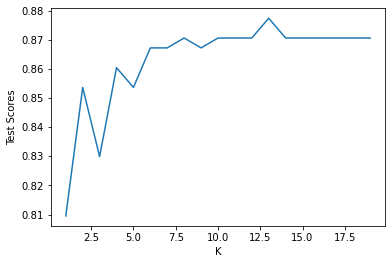

In [1106]:
sns.lineplot(x = knn_df['K'], y = knn_df['Test Scores'])

In [1130]:
knn = KNeighborsClassifier()

In [1131]:
grid_tuning_knn(knn, 5, 'precision_score')

Best refit score: precision_score
Best F1 score: 0.22606900562124438
Best hyperparameter: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [1132]:
knn2 = KNeighborsClassifier(n_neighbors = 3, 
                            metric = 'manhattan', 
                             weights = 'uniform')

In [1133]:
# Model fitting
knn2.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [1134]:
#Model predictions
knn_pred = knn2.predict(X_test)

In [1135]:
knn_pred_proba = knn2.predict_proba(X_test)[:,1]

### Model Evaluations

##### Confusion Matrix

Usual plot for Confusion Matrix


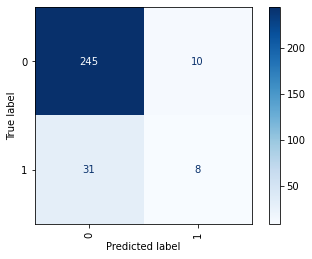

<Figure size 640x640 with 0 Axes>

None

Different plot for CF


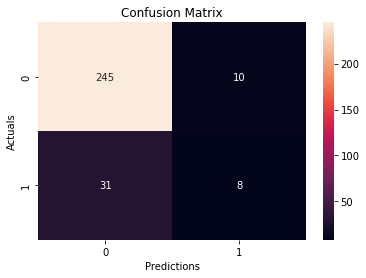

<Figure size 640x640 with 0 Axes>

None

In [1136]:
#Confusion Matrix
cf_matrix(y_test, knn_pred)

##### Precision Recall Curve

For both the precision recall curve and roc curve always pass the predicted probas of X_test 

/var/folders/r6/1g8m0xd94_7blqsglzmqftd40000gn/T/ipykernel_1178/766251215.py:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)


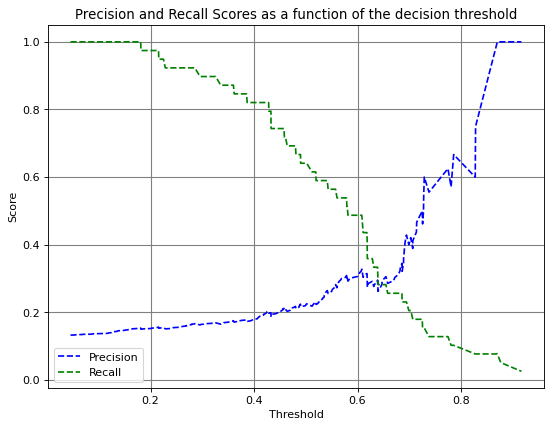

None

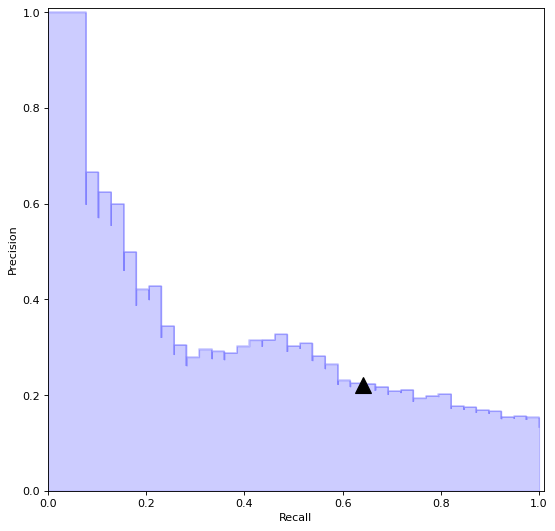

None

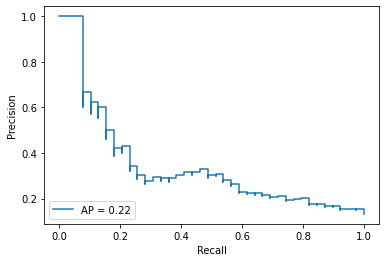

In [1138]:
figure(figsize=(8, 6), dpi=80)
plot_precision_recall_vs_thresholds(y_test, knn_pred_proba, 0.5)

##### ROC Curve

For both the precision recall curve and roc curve **always pass the predicted probas of X_test**

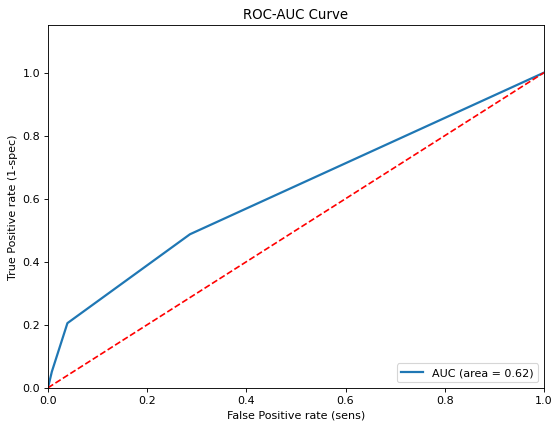

In [1139]:
figure(figsize=(8, 6), dpi=80)
roc_auc_score_fn(y_test, knn_pred_proba)

##### Metrics

In [1140]:
#Printing scores for tuned model
print_scores(y_test, knn_pred, knn_pred_proba)

ROC-AUC score  test dataset:  	 0.6204625439919558
precision score  test dataset:  	 0.4444444444444444
Recall score  test dataset:  	 0.20512820512820512
f1 score  test dataset :  	 0.2807017543859649
Model accuracy score: 0.8605	


In [1141]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       255
           1       0.44      0.21      0.28        39

    accuracy                           0.86       294
   macro avg       0.67      0.58      0.60       294
weighted avg       0.83      0.86      0.84       294



## 5. KMEANS - CLUSTERING

In [1161]:
X_scaled = scaler.fit(X)

In [1163]:
pca = PCA(n_components=2)
pca_notscaled = pca.fit_transform(X)

For n_clusters = 2 The average silhouette_score is : 0.7079510320744494
For n_clusters = 3 The average silhouette_score is : 0.6234192713924033
For n_clusters = 4 The average silhouette_score is : 0.6103210878044341
For n_clusters = 5 The average silhouette_score is : 0.6154894425545782
For n_clusters = 6 The average silhouette_score is : 0.6170042947381766


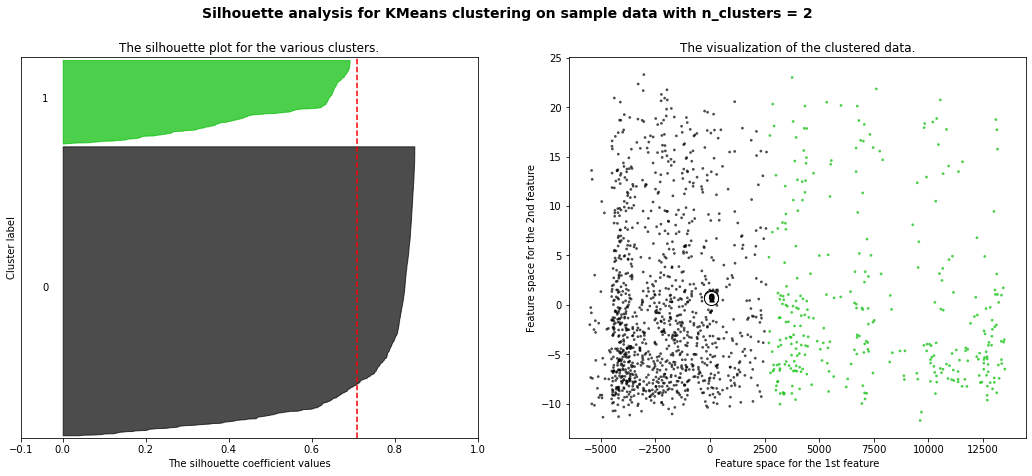

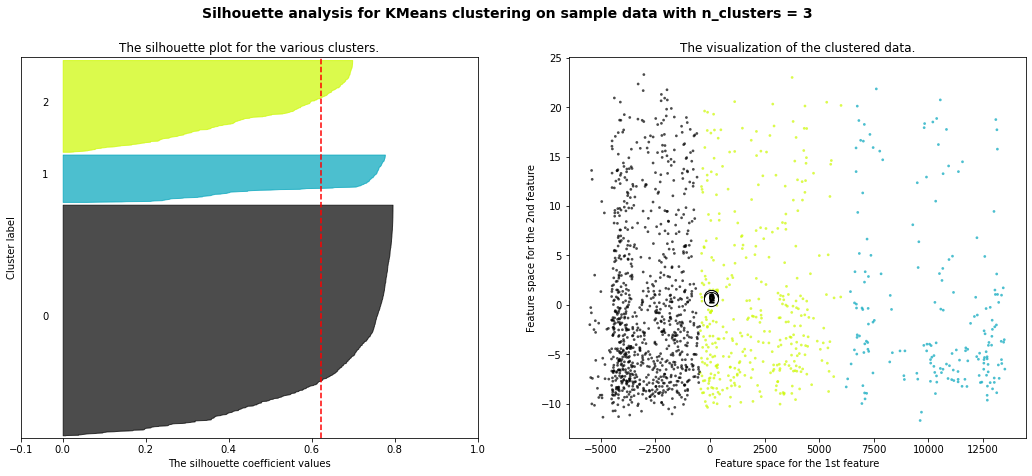

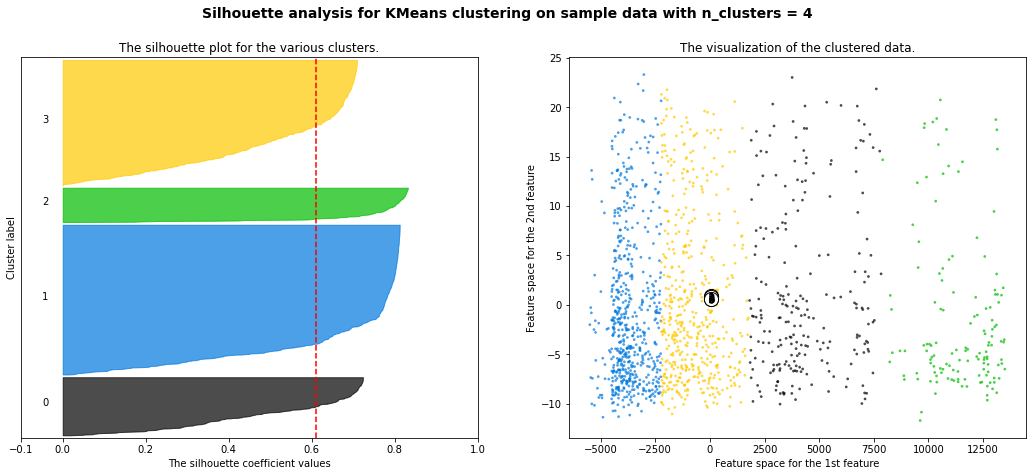

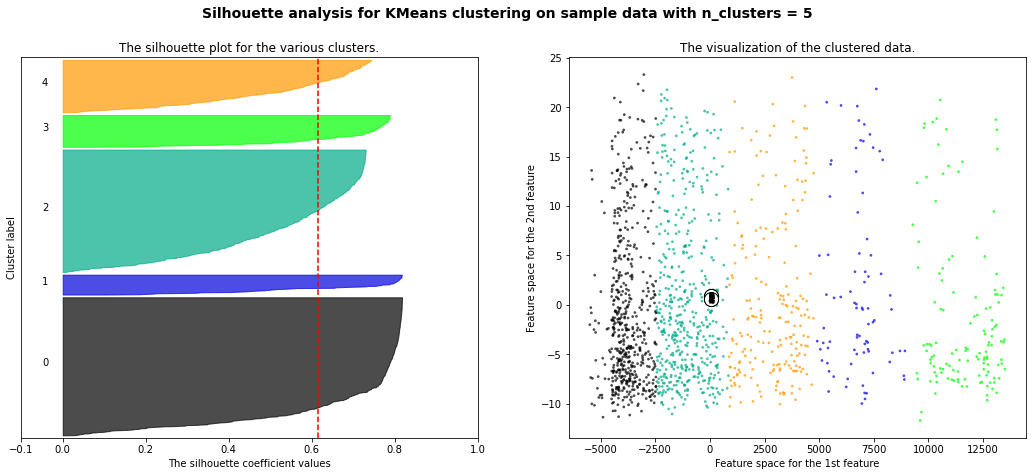

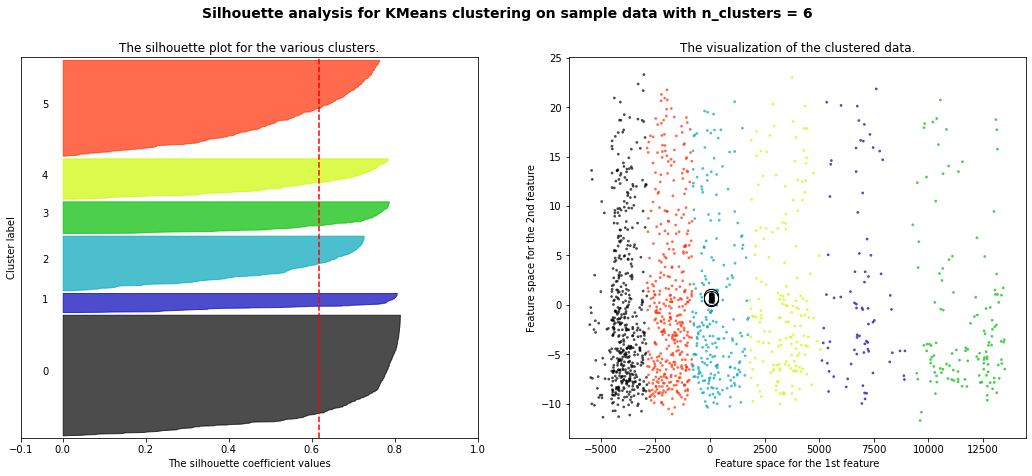

[32.69120654 44.76923077 37.03153153 47.14728682 39.64634146 36.06958763]
[0.90388548 0.75641026 0.59009009 0.84496124 0.56097561 0.65463918]


In [1165]:
#Clustering using pca
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_notscaled[:, 0], pca_notscaled[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
print(centers[:, 0])
print(centers[:, 1])

**COMMENT - 2 clusters seems reasonable according to the silhoutte scores** 

Further, we can explore more on the clusters and derive relevant suggestions from those